PHASE -4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
# print(os.listdir("../input"))

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Joining more CSV files:

In [3]:
df1=pd.read_csv("C:\\Users\\DIVYA REKHA\\Desktop\\data collection_csv\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df2=pd.read_csv("C:\\Users\\DIVYA REKHA\\Desktop\\data collection_csv\\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df3=pd.read_csv("C:\\Users\\DIVYA REKHA\\Desktop\\data collection_csv\\03_District_wise_crimes_committed_against_children_2001_2012.csv")
df4=pd.read_csv("C:\\Users\\DIVYA REKHA\\Desktop\\data collection_csv\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df5=pd.read_csv("C:\\Users\\DIVYA REKHA\\Desktop\\data collection_csv\\02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [4]:
df2['Overall crimes against women']=df2['Rape']+df2['Kidnapping and Abduction']+df2['Dowry Deaths']+df2['Assault on women with intent to outrage her modesty']+df2['Insult to modesty of Women']+df2['Cruelty by Husband or his Relatives']+df2['Importation of Girls']

In [5]:
df2.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Overall crimes against women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


In [6]:
df3['Overall crimes against children']= df3['Total']

In [7]:
df3.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Overall crimes against children
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [8]:
df4['Overall crimes against SCs']= df4['Kidnapping and Abduction']+df4['Rape']+df4['Dacoity']+df4['Robbery']+df4['Arson']+df4['Hurt']+df4['Prevention of atrocities (POA) Act']+df4['Protection of Civil Rights (PCR) Act']+df4['Other Crimes Against SCs']

In [9]:
df4.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Overall crimes against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32,55
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53,127
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34,111
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7,88


In [10]:
df5['Overall crimes against STs']=df5['Murder']+df5['Rape']+df5['Kidnapping Abduction']+df5['Dacoity']+df5['Robbery']+df5['Arson']+df5['Hurt']+df5['Protection of Civil Rights (PCR) Act']+df5['Prevention of atrocities (POA) Act']+df5['Other Crimes Against STs']

In [11]:
df5.head()


,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Overall crimes against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13,18
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6,14
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0,2
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14,14


In [12]:
df=pd.concat([df1,df2['Overall crimes against women'],df3['Overall crimes against children'],df4['Overall crimes against SCs'],df5['Overall crimes against STs']],axis=1)

In [13]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 9018 Rows and 37 Columns in our dataframe


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,454.0,0.0,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,356.0,66.0,127,14
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,456.0,0.0,111,2
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,278.0,0.0,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,475.0,0.0,88,14


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

In [15]:
df.isna().sum()

STATE/UT                                               1
DISTRICT                                               1
YEAR                                                   1
MURDER                                                 1
ATTEMPT TO MURDER                                      1
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              1
RAPE                                                   1
CUSTODIAL RAPE                                         1
OTHER RAPE                                             1
KIDNAPPING & ABDUCTION                                 1
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            1
KIDNAPPING AND ABDUCTION OF OTHERS                     1
DACOITY                                                1
PREPARATION AND ASSEMBLY FOR DACOITY                   1
ROBBERY                                                1
BURGLARY                                               1
THEFT                                                  1
AUTO THEFT                     

In [16]:
df = df.dropna()

In [17]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,454.0,0.0,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,356.0,66.0,127,14
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,456.0,0.0,111,2
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,278.0,0.0,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,475.0,0.0,88,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0,0
9011,DELHI UT,WEST,2012.0,52.0,37.0,10.0,79.0,0.0,79.0,454.0,...,6.0,327.0,0.0,292.0,1144.0,5558.0,739.0,0.0,2,0
9012,LAKSHADWEEP,LAKSHADWEEP,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,32.0,60.0,2.0,7.0,44,0
9013,LAKSHADWEEP,TOTAL,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,32.0,60.0,2.0,25.0,0,0


In [18]:
df['DISTRICT'].value_counts()

DISTRICT
TOTAL              407
G.R.P.              46
SOUTH               37
NORTH               37
WEST                36
                  ... 
RAILWAYS KMR         1
MIDNAPUR             1
A and N ISLANDS      1
KAWARDHA             1
CAR                  1
Name: count, Length: 808, dtype: int64

In [19]:
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [20]:
print(list(np.where(df1["DISTRICT"]=='DELHI UT TOTAL')))

[array([ 700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997], dtype=int64)]


# We are removing these rows which is having total, coz we already have the particular value of district and futher we are going to use that data for prediction.

In [21]:
df.drop([  700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997,28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3305, 3315, 3323, 3332,
       3343, 3378, 3403, 3437, 3442, 3480, 3485, 3557, 3571, 3597, 3600,
       3602, 3604, 3607, 3622, 3624, 3654, 3670, 3701, 3746, 3768, 3771,
       3802, 3825, 3839, 3864, 3889, 3921, 3941, 3993, 4039, 4049, 4057,
       4066, 4077, 4112, 4138, 4177, 4182, 4220, 4225, 4297, 4311, 4336,
       4339, 4341, 4343, 4346, 4361, 4364, 4394, 4410, 4441, 4486, 4508,
       4511, 4542, 4565, 4579, 4604, 4631, 4663, 4683, 4735, 4781, 4791,
       4799, 4808, 4820, 4855, 4881, 4920, 4925, 4963, 4968, 5040, 5054,
       5079, 5081, 5083, 5085, 5088, 5104, 5107, 5137, 5153, 5184, 5229,
       5251, 5254, 5286, 5309, 5323, 5351, 5378, 5412, 5431, 5485, 5531,
       5542, 5550, 5559, 5571, 5608, 5634, 5674, 5679, 5718, 5723, 5796,
       5810, 5835, 5838, 5840, 5842, 5845, 5865, 5868, 5898, 5915, 5946,
       5991, 6013, 6016, 6048, 6071, 6087, 6116, 6143, 6177, 6196, 6250,
       6296, 6307, 6315, 6324, 6336, 6373, 6399, 6439, 6444, 6485, 6490,
       6563, 6577, 6602, 6605, 6607, 6609, 6612, 6632, 6635, 6669, 6687,
       6718, 6763, 6785, 6788, 6821, 6844, 6860, 6890, 6917, 6952, 6971,
       7025, 7071, 7082, 7090, 7099, 7111, 7148, 7175, 7216, 7221, 7262,
       7268, 7342, 7356, 7381, 7384, 7386, 7388, 7391, 7411, 7414, 7448,
       7466, 7497, 7542, 7565, 7568, 7603, 7626, 7642, 7672, 7699, 7735,
       7756, 7810, 7856, 7867, 7875, 7884, 7896, 7933, 7962, 8004, 8009,
       8049, 8055, 8132, 8146, 8172, 8175, 8177, 8179, 8182, 8202, 8205,
       8239, 8257, 8290, 8335, 8364, 8367, 8402, 8426, 8442, 8473, 8500,
       8536, 8557, 8611, 8657, 8668, 8676, 8685, 8697, 8734, 8763, 8806,
       8811, 8851, 8861, 8938, 8952, 8982, 8986, 8988, 8990, 8993, 9013], axis=0, inplace=True)

In [22]:
df.reset_index(drop = True)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,454.0,0.0,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,356.0,66.0,127,14
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,456.0,0.0,111,2
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,278.0,0.0,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,475.0,0.0,88,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH-WEST,2012.0,47.0,48.0,6.0,87.0,0.0,87.0,399.0,...,21.0,207.0,0.0,4.0,1387.0,4085.0,646.0,4462.0,10,0
8592,DELHI UT,STF,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0,0
8593,DELHI UT,WEST,2012.0,52.0,37.0,10.0,79.0,0.0,79.0,454.0,...,6.0,327.0,0.0,292.0,1144.0,5558.0,739.0,0.0,2,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,32.0,60.0,2.0,7.0,44,0


In [23]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Overall crimes against women', 'Overall crimes against children',
       'Overall crimes against SCs', 'Overall crimes against STs'],
      dtype='object')

# A few columns have been removed from our dataset because they relate to total crimes against women and already exist there. These include "INSULT TO MODESTY OF WOMEN," "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS," "CRUELTY BY HUSBAND OR HIS RELATIVES," "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES," and "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY.

In [24]:
df.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],axis=1, inplace=True)

In [25]:
df.shape

(8596, 32)

In [26]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
count,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,...,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.00000,8596.000000
mean,2006.634714,46.826315,40.944160,5.188925,27.818753,0.003025,27.815728,41.512331,10.812820,6.910656,...,13.225221,392.187529,10.609819,116.524546,1140.200209,2784.685900,238.193695,55.777106,68.32806,12.757562
std,3.463783,42.757595,50.592362,9.948449,30.898847,0.079206,30.894872,56.064790,21.319814,10.946224,...,30.416814,559.609844,14.186965,155.595962,1438.891790,3068.186327,291.531062,263.230052,316.19019,63.426896
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,9.000000,1.000000,1.000000,...,2.000000,40.000000,1.000000,5.000000,255.000000,834.750000,62.000000,0.000000,1.00000,0.000000
50%,2007.000000,37.000000,27.000000,2.000000,19.000000,0.000000,19.000000,24.000000,5.000000,3.000000,...,8.000000,191.000000,5.000000,65.000000,714.500000,2011.000000,162.000000,11.000000,17.00000,0.000000
75%,2010.000000,63.000000,54.000000,5.000000,39.000000,0.000000,39.000000,52.000000,12.000000,9.000000,...,18.000000,490.000000,15.000000,166.000000,1527.250000,3789.500000,308.000000,38.000000,59.00000,8.000000
max,2012.000000,542.000000,741.000000,241.000000,568.000000,5.000000,568.000000,587.000000,484.000000,219.000000,...,2350.000000,4837.000000,168.000000,2058.000000,32452.000000,34638.000000,4556.000000,6033.000000,7770.00000,1501.000000


Observations:-

With a minimum value of 0 and a maximum value of 542 for the murder column, a few districts ought to have this count as its maximum murder value. ATTEMPT TO MURDER has a maximum value of 741. In contrast, the RAPE column has a maximum value of 568. We can also check the other columns. Total crimes against women have a minimum value of 0 and a maximum value of 4556. The total IPC offenses have a minimum value of 0 and a maximum value of 34638.

Based on these valuable insights.Districts with mid values fall under the category of moderate area, districts with maximum values for columns fall under the category of sensitive area, while districts with minimum values fall under the category of peaceful area.

In [27]:
#Sorting by state or territory

group_state = df.groupby('STATE/UT')

In [28]:
group_state.first()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,ANDAMAN,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,0.0,...,4.0,113.0,0.0,0.0,310.0,637.0,33.0,0.0,0,0
ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,16.0,...,30.0,1131.0,16.0,181.0,1518.0,4154.0,454.0,0.0,55,18
ARUNACHAL PRADESH,CHANGLANG,2001.0,11.0,2.0,0.0,1.0,0.0,1.0,3.0,1.0,...,1.0,30.0,0.0,0.0,54.0,163.0,6.0,0.0,0,5
ASSAM,BARPETA,2001.0,64.0,5.0,0.0,28.0,0.0,28.0,105.0,17.0,...,38.0,266.0,10.0,87.0,430.0,1778.0,250.0,0.0,0,0
BIHAR,ARARIA,2001.0,47.0,27.0,4.0,93.0,0.0,93.0,79.0,66.0,...,3.0,10.0,11.0,26.0,944.0,2069.0,170.0,12.0,42,4
CHANDIGARH,CHANDIGARH,2001.0,15.0,10.0,6.0,18.0,0.0,18.0,56.0,6.0,...,5.0,95.0,3.0,6.0,914.0,3397.0,146.0,58.0,3,0
CHHATTISGARH,BALRAMPUR,2001.0,13.0,2.0,0.0,17.0,0.0,17.0,1.0,0.0,...,2.0,30.0,1.0,7.0,40.0,235.0,44.0,0.0,0,0
D & N HAVELI,D and N HAVELI,2001.0,3.0,2.0,0.0,6.0,0.0,6.0,4.0,2.0,...,1.0,29.0,0.0,0.0,183.0,350.0,19.0,0.0,0,6
DAMAN & DIU,DAMAN,2001.0,6.0,5.0,0.0,0.0,0.0,0.0,5.0,2.0,...,3.0,18.0,0.0,0.0,54.0,194.0,7.0,0.0,0,0


In [29]:
# Printing each group's maximum value.
group_state.max()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,SOUTH,2012.0,16.0,19.0,4.0,23.0,0.0,23.0,16.0,3.0,...,15.0,113.0,2.0,9.0,479.0,956.0,90.0,96.0,85,91
ANDHRA PRADESH,WEST GODAVARI,2012.0,214.0,248.0,31.0,130.0,1.0,130.0,172.0,93.0,...,124.0,4837.0,62.0,2058.0,3719.0,20252.0,2815.0,2274.0,549,164
ARUNACHAL PRADESH,UPPER DIBANG VALLEY,2012.0,17.0,14.0,4.0,13.0,0.0,13.0,23.0,12.0,...,19.0,84.0,1.0,28.0,155.0,576.0,43.0,39.0,4469,830
ASSAM,UDALGURI,2012.0,143.0,129.0,71.0,181.0,3.0,179.0,386.0,149.0,...,2350.0,969.0,29.0,506.0,5253.0,10545.0,1654.0,392.0,65,72
BIHAR,VAISHALI,2012.0,542.0,741.0,92.0,219.0,1.0,219.0,376.0,263.0,...,137.0,4157.0,168.0,781.0,9061.0,14491.0,843.0,2894.0,426,244
CHANDIGARH,CHANDIGARH,2012.0,31.0,44.0,10.0,33.0,0.0,33.0,87.0,21.0,...,9.0,107.0,10.0,15.0,1111.0,3931.0,241.0,66.0,3,17
CHHATTISGARH,SURAJPUR,2012.0,139.0,181.0,27.0,159.0,0.0,159.0,115.0,41.0,...,59.0,3161.0,30.0,556.0,7724.0,11218.0,754.0,1881.0,4794,486
D & N HAVELI,D and N HAVELI,2012.0,14.0,5.0,1.0,7.0,0.0,7.0,18.0,8.0,...,12.0,35.0,1.0,24.0,195.0,442.0,32.0,17.0,2,23
DAMAN & DIU,DIU,2012.0,12.0,6.0,1.0,5.0,0.0,5.0,5.0,2.0,...,10.0,18.0,1.0,36.0,69.0,243.0,8.0,34.0,2,16


In [30]:
#Printing each group's most recent value.
group_state.last()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,SOUTH,2012.0,8.0,3.0,0.0,8.0,0.0,8.0,7.0,1.0,...,4.0,50.0,2.0,5.0,273.0,544.0,36.0,96.0,0,0
ANDHRA PRADESH,WEST GODAVARI,2012.0,91.0,91.0,4.0,130.0,0.0,130.0,86.0,27.0,...,37.0,2313.0,19.0,578.0,1237.0,7867.0,1496.0,0.0,50,8
ARUNACHAL PRADESH,UPPER DIBANG VALLEY,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,12.0,1.0,0.0,0,0
ASSAM,UDALGURI,2012.0,33.0,27.0,0.0,23.0,0.0,23.0,58.0,20.0,...,11.0,150.0,8.0,31.0,189.0,815.0,156.0,65.0,0,0
BIHAR,VAISHALI,2012.0,122.0,153.0,13.0,20.0,0.0,20.0,223.0,52.0,...,16.0,2088.0,62.0,219.0,417.0,5186.0,450.0,54.0,50,0
CHANDIGARH,CHANDIGARH,2012.0,21.0,44.0,5.0,27.0,0.0,27.0,87.0,21.0,...,9.0,42.0,5.0,3.0,1042.0,3606.0,241.0,8.0,0,4
CHHATTISGARH,SURAJPUR,2012.0,59.0,16.0,0.0,74.0,0.0,74.0,15.0,0.0,...,4.0,481.0,5.0,113.0,373.0,1500.0,232.0,75.0,0,0
D & N HAVELI,D and N HAVELI,2012.0,7.0,2.0,0.0,3.0,0.0,3.0,13.0,4.0,...,12.0,25.0,0.0,23.0,112.0,318.0,14.0,7.0,2,0
DAMAN & DIU,DIU,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,0.0,9.0,12.0,37.0,2.0,0.0,0,0


Data Preparation Prior to Standardization Implementation

In [31]:
X=df[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Overall crimes against women','Overall crimes against children','Overall crimes against SCs','Overall crimes against STs']]

In [32]:
from sklearn.cluster import KMeans

Data Normalization for all Kinds of Clustering

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X)
print(df_scaled)
df1 = pd.DataFrame(df_scaled)

[[-1.62684623  1.26706931  0.37667639 ... -0.21190723 -0.04215449
   0.08265805]
 [-1.62684623  2.43652022  1.66153004 ...  0.03883861  0.18556981
   0.01958965]
 [-1.62684623  1.26706931  0.31737545 ... -0.21190723  0.13496441
  -0.16961554]
 ...
 [ 1.54905748  0.12100742 -0.07796413 ... -0.21190723 -0.20978487
  -0.20114974]
 [ 1.54905748 -1.09522152 -0.80934236 ... -0.18531297 -0.0769457
  -0.20114974]
 [ 1.54905748 -0.97827643 -0.69074049 ... -0.09033349 -0.21611054
  -0.20114974]]


K-Means Cluster Analysis

C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\L

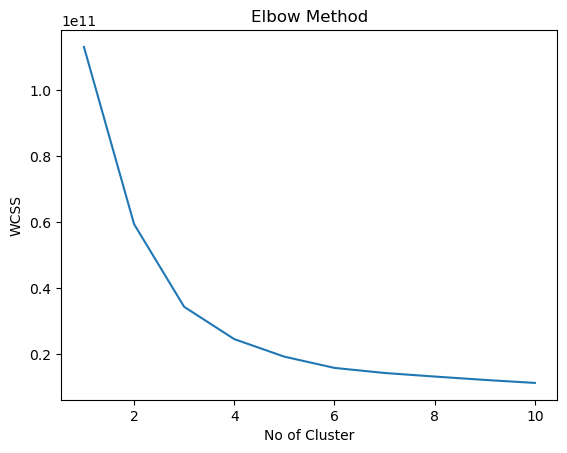

In [34]:
wcss=[] # the sum of square distance within cluster.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DIVYA REKHA\anaconda3\L

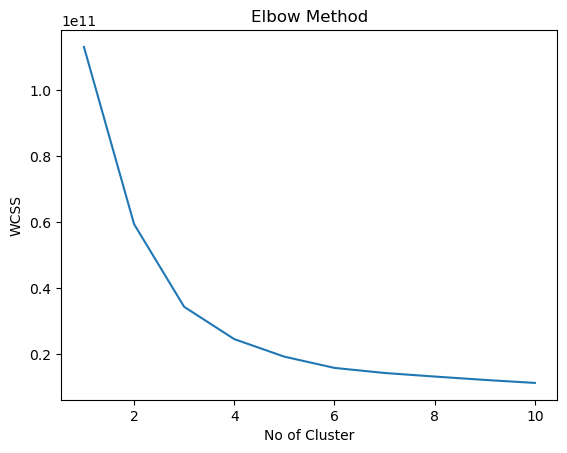

In [35]:
wcss=[] # the sum of square distance within cluster.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

Selecting k=3 is appropriate as, in order to meet the requirements, we must build three clusters. The Elbow technique also demonstrates this.

In [36]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [37]:
kmeans.fit(X)

C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [38]:

y_kmeans = kmeans.fit_predict(df1)

y_kmeans

C:\Users\DIVYA REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1])

In [39]:
print(kmeans.labels_)

[0 0 0 ... 0 1 1]


In [40]:
#starting the cluster numbering at 0 rather than 1.
y_kmeans1=y_kmeans+1

4.1 Create 3 clusters.

In [41]:
cluster = list(y_kmeans1)

# A cluster is added to our dataset.

df['cluster'] = cluster

In [42]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,1131.0,16.0,181.0,1518.0,4154.0,454.0,0.0,55,18,1
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,1543.0,7.0,270.0,754.0,4125.0,356.0,66.0,127,14,1
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,2088.0,14.0,404.0,1262.0,5818.0,456.0,0.0,111,2,1
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,795.0,17.0,233.0,1181.0,3140.0,278.0,0.0,100,4,2
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1244.0,12.0,431.0,2313.0,6507.0,475.0,0.0,88,14,1


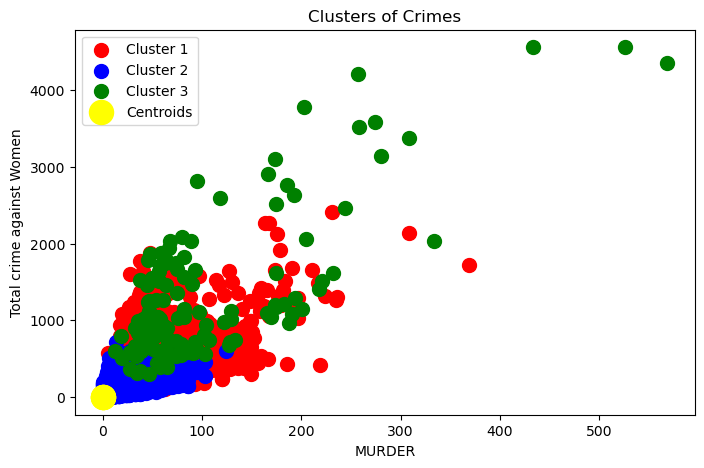

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans1 == 1]['RAPE'], X[y_kmeans1 == 1]['Overall crimes against women'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans1 == 2]['RAPE'], X[y_kmeans1 == 2]['Overall crimes against women'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans1 == 3]['RAPE'], X[y_kmeans1 == 3]['Overall crimes against women'], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('MURDER')
plt.ylabel('Total crime against Women')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

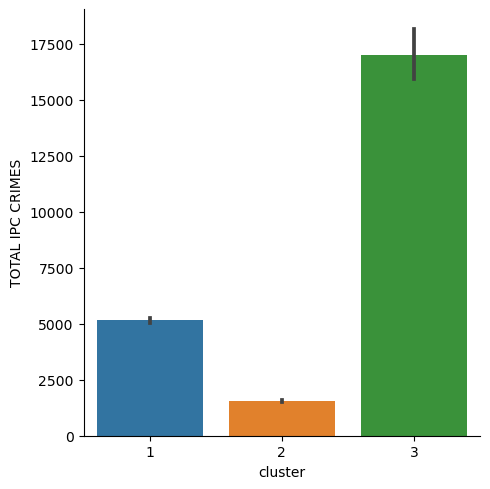

In [44]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df, kind='bar');
plt.savefig('clustercatplot.jpg')

In [45]:
data1=df[df['cluster']==1]
data2=df[df['cluster']==2]
data3=df[df['cluster']==3]

District-by-district Grouping and Then Looking for the Maximum Values for Each Column

In [46]:
data3.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2012.0,244.0,238.0,241.0,203.0,0.0,203.0,587.0,173.0,...,349.0,88.0,17.0,7918.0,17412.0,3780.0,45.0,61,3,3
24 PARGANAS SOUTH,WEST BENGAL,2012.0,263.0,123.0,48.0,308.0,0.0,308.0,419.0,65.0,...,292.0,67.0,131.0,7641.0,15299.0,3583.0,29.0,10,5,3
AGRA,UTTAR PRADESH,2012.0,181.0,182.0,40.0,76.0,0.0,76.0,395.0,67.0,...,411.0,88.0,515.0,2509.0,10290.0,1028.0,113.0,74,30,3
AHMEDABAD COMMR.,GUJARAT,2012.0,222.0,143.0,60.0,63.0,0.0,63.0,230.0,93.0,...,1594.0,19.0,252.0,12112.0,21442.0,1791.0,16.0,82,13,3
ALWAR,RAJASTHAN,2012.0,100.0,88.0,7.0,129.0,0.0,129.0,243.0,89.0,...,2612.0,47.0,503.0,2620.0,11941.0,1120.0,68.0,180,26,3
BANGALORE COMMR.,KARNATAKA,2012.0,266.0,460.0,8.0,97.0,1.0,97.0,573.0,484.0,...,4029.0,54.0,170.0,12547.0,32380.0,1470.0,91.0,149,24,3
CHENNAI,TAMIL NADU,2012.0,180.0,332.0,4.0,94.0,0.0,94.0,87.0,22.0,...,1466.0,20.0,1431.0,12464.0,21346.0,639.0,17.0,36,0,3
CYBERABAD,ANDHRA PRADESH,2012.0,213.0,128.0,17.0,95.0,0.0,95.0,168.0,93.0,...,4028.0,59.0,1188.0,3155.0,17979.0,2815.0,7.0,210,28,3
GHAZIABAD,UTTAR PRADESH,2010.0,254.0,277.0,35.0,53.0,0.0,53.0,491.0,170.0,...,53.0,69.0,1166.0,3123.0,11821.0,1266.0,29.0,52,0,3


Creating a senstivearea dataframe (with cluster value 3) from data3.


In [47]:
sensitivearea=df[df['cluster']==3]

In [48]:
# Verifying data2

In [49]:
data2.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
A and N ISLANDS,A & N ISLANDS,2007.0,15.0,19.0,1.0,3.0,0.0,3.0,12.0,3.0,...,99.0,1.0,4.0,337.0,807.0,54.0,10.0,3,5,2
AHMEDABAD RURAL,GUJARAT,2012.0,63.0,33.0,8.0,12.0,0.0,12.0,74.0,12.0,...,518.0,7.0,467.0,2308.0,4006.0,268.0,72.0,135,10,2
AHWA-DANG,GUJARAT,2012.0,11.0,3.0,0.0,5.0,0.0,5.0,2.0,1.0,...,34.0,1.0,31.0,188.0,292.0,20.0,78.0,93,9,2
AIZAWL,MIZORAM,2012.0,23.0,24.0,6.0,42.0,0.0,42.0,7.0,7.0,...,51.0,0.0,30.0,665.0,1871.0,94.0,9.0,0,2,2
AKOLA,MAHARASHTRA,2012.0,64.0,52.0,3.0,29.0,0.0,29.0,29.0,5.0,...,843.0,9.0,172.0,1306.0,4222.0,339.0,53.0,48,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST,TRIPURA,2012.0,136.0,30.0,1.0,77.0,0.0,77.0,63.0,47.0,...,277.0,22.0,114.0,589.0,1942.0,475.0,144.0,38,11,2
WOKHA,NAGALAND,2012.0,12.0,7.0,1.0,3.0,0.0,3.0,4.0,2.0,...,10.0,0.0,4.0,24.0,99.0,4.0,20.0,2,90,2
YADGIRI,KARNATAKA,2012.0,26.0,51.0,0.0,9.0,0.0,9.0,26.0,26.0,...,353.0,3.0,135.0,613.0,1592.0,198.0,94.0,39,0,2


In [50]:
data2.shape

(6106, 33)

There is peace in this area because data2 (cluster value 2) contains 6106 rows with lower maximum values than data3 value and lower values than data1 (cluster value 1).

In [51]:
moderatearea=df[df['cluster']==2] 

We have a sensitive, peaceful location, hence data1 with cluster value 1 will be our moderate area.

Cluster 1 data analysis by district group

In [52]:
peacefularea=df[df['cluster']==1]

In [53]:
data1.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2007.0,204.0,70.0,61.0,231.0,0.0,231.0,236.0,58.0,...,281.0,71.0,113.0,4228.0,9201.0,2405.0,2.0,94,1,1
24 PARGANAS SOUTH,WEST BENGAL,2006.0,140.0,8.0,75.0,190.0,0.0,190.0,155.0,12.0,...,390.0,68.0,67.0,3818.0,7396.0,1677.0,0.0,1,2,1
ADILABAD,ANDHRA PRADESH,2012.0,113.0,94.0,17.0,88.0,0.0,88.0,96.0,30.0,...,2172.0,22.0,400.0,2265.0,6122.0,919.0,90.0,74,18,1
AGRA,UTTAR PRADESH,2010.0,158.0,190.0,55.0,66.0,0.0,66.0,252.0,71.0,...,573.0,83.0,591.0,2085.0,6925.0,1013.0,110.0,365,35,1
AHMEDNAGAR,MAHARASHTRA,2012.0,134.0,108.0,6.0,78.0,0.0,78.0,82.0,23.0,...,802.0,32.0,744.0,1918.0,7648.0,1011.0,125.0,4138,1501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WARANGAL URBAN,ANDHRA PRADESH,2011.0,46.0,10.0,5.0,35.0,0.0,35.0,55.0,40.0,...,499.0,26.0,230.0,1730.0,3797.0,271.0,2213.0,94,57,1
WARDHA,MAHARASHTRA,2010.0,41.0,29.0,5.0,44.0,0.0,44.0,26.0,4.0,...,808.0,5.0,205.0,1513.0,4369.0,337.0,104.0,21,41,1
WEST,TRIPURA,2012.0,83.0,72.0,19.0,118.0,0.0,118.0,454.0,199.0,...,609.0,27.0,307.0,4151.0,7690.0,739.0,214.0,19,35,1


In [54]:
data1.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2001.0,168.0,6.0,38.0,53.0,0.0,53.0,81.0,0.0,...,0.0,23.0,0.0,3036.0,6167.0,649.0,0.0,0,0,1
24 PARGANAS SOUTH,WEST BENGAL,2001.0,107.0,2.0,34.0,47.0,0.0,47.0,53.0,1.0,...,0.0,43.0,0.0,3211.0,5827.0,681.0,0.0,0,0,1
ADILABAD,ANDHRA PRADESH,2001.0,73.0,39.0,8.0,35.0,0.0,35.0,41.0,6.0,...,1044.0,5.0,181.0,881.0,4154.0,454.0,0.0,14,0,1
AGRA,UTTAR PRADESH,2001.0,109.0,116.0,18.0,26.0,0.0,26.0,99.0,26.0,...,360.0,38.0,40.0,896.0,3438.0,452.0,13.0,3,0,1
AHMEDNAGAR,MAHARASHTRA,2001.0,81.0,38.0,0.0,41.0,0.0,41.0,25.0,7.0,...,575.0,0.0,445.0,975.0,4251.0,404.0,6.0,13,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WARANGAL URBAN,ANDHRA PRADESH,2011.0,46.0,10.0,5.0,35.0,0.0,35.0,55.0,40.0,...,499.0,26.0,230.0,1730.0,3797.0,271.0,2213.0,94,57,1
WARDHA,MAHARASHTRA,2008.0,36.0,27.0,3.0,26.0,0.0,26.0,26.0,4.0,...,744.0,2.0,176.0,1197.0,3882.0,333.0,27.0,17,18,1
WEST,DELHI UT,2001.0,46.0,14.0,0.0,44.0,0.0,44.0,48.0,6.0,...,210.0,6.0,4.0,641.0,2420.0,228.0,0.0,1,0,1



4.2 For every cluster, creating a DataFrame that displays data based on the areas.

3 datasets were created based on the cluster value and given the following names.

Cluster 3: Sensitive Area; Cluster 2: Moderate Area; Cluster 1: Peaceful Area

In [55]:
kmeans.cluster_centers_

array([[ 0.09576728,  0.84394885,  0.70616807,  0.44952228,  0.76045684,
         0.05307021,  0.76041864,  0.69922109,  0.48716835,  0.49083772,
         0.17447637,  0.45743734,  0.51649555,  0.39197044,  0.36143549,
         0.36618551,  0.60201696,  0.43278672,  0.40211008,  0.21121363,
         0.40644159,  0.66614448,  0.75453629,  0.71973539,  0.65134492,
         0.77082204,  0.79567046,  0.10070773,  0.05575093,  0.0651748 ],
       [-0.04310406, -0.39284977, -0.3277716 , -0.20594249, -0.34823543,
        -0.02164165, -0.34822476, -0.34416545, -0.25985417, -0.23225882,
        -0.1316474 , -0.274764  , -0.29436691, -0.27069558, -0.24891735,
        -0.25343628, -0.2812408 , -0.26853402, -0.26157161, -0.16497092,
        -0.16250036, -0.31990325, -0.33340571, -0.32318313, -0.32151461,
        -0.40317405, -0.39173457, -0.0385815 , -0.02092658, -0.02385512],
       [ 0.2704469 ,  2.94990917,  2.4272181 ,  1.42711848,  2.40738994,
         0.05199656,  2.40756642,  3.25869936,  3

In [56]:
def generate_countplot(x):
    plt.figure(figsize=(70,20))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col1 = ['STATE/UT', 'YEAR']

In [57]:
def generate_countplot(column):
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=df, palette='viridis')
    plt.title('Countplot for {}'.format(column))
    plt.show()

Countplot for STATE/UT column:


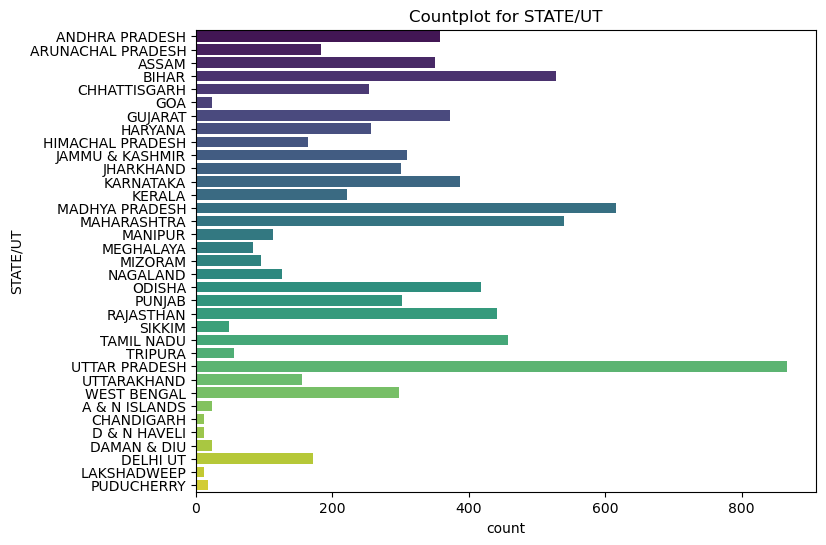

Countplot for DISTRICT column:


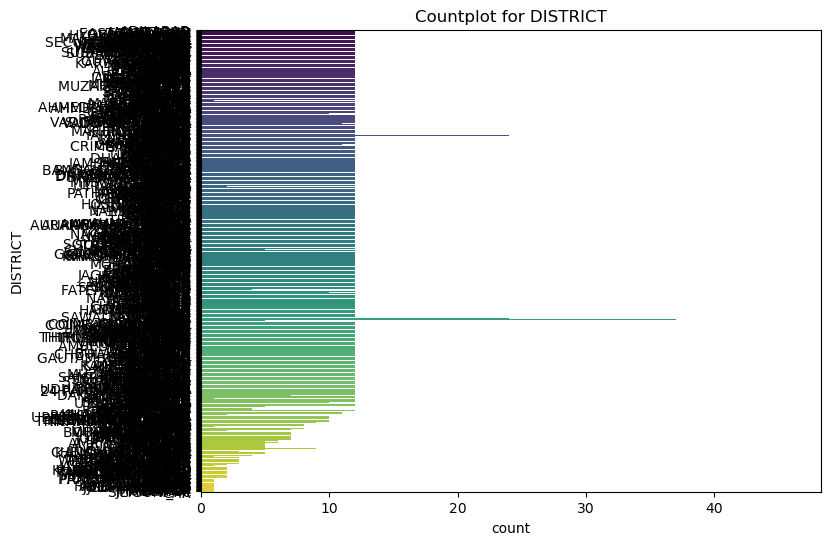

In [58]:
string_columns = df.select_dtypes(include=['object']).columns

# Iterate through the string columns and generate count plots
for column in string_columns:
    print("Countplot for {} column:".format(column))
    generate_countplot(column)

# numeric_convert = df.select_dtypes(include=['float64', 'int64'])

Sensitive Area Analysis

In [59]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Overall crimes against women', 'Overall crimes against children',
       'Overall crimes against SCs', 'Overall crimes against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#'Year' and 'State' features in a pivot table that illustrates a specific crime

C:\Users\DIVYA REKHA\AppData\Local\Temp\ipykernel_15272\3897544120.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',


ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT    YEAR                                           
ANDHRA PRADESH CYBERABAD   2005.0   37.0               88.0       563.0   
                           2006.0   43.0               92.0       642.0   
                           2007.0   74.0               84.0      1124.0   
                           2008.0   42.0               66.0      1202.0   
                           2009.0   71.0               84.0      1365.0   
...                                  ...                ...         ...   
WEST BENGAL    MURSHIDABAD 2010.0   54.0              620.0       204.0   
                           2011.0   45.0              637.0       186.0   
                           2012.0   50.0              395.0       309.0   
               NADIA       2011.0   13.0              375.0       243.0   
                           2012.0   22.0              357.0       244.0   

                                   BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT    YEAR                                            
ANDHRA PRADESH CYBERABAD   2005.0    1139.0                        898.0   
                           2006.0    1321.0                       1064.0   
                           2007.0    1165.0                       1188.0   
                           2008.0    1319.0                       1166.0   
                           2009.0    1348.0                       1063.0   
...                                     ...                          ...   
WEST BENGAL    MURSHIDABAD 2010.0       7.0                        311.0   
                           2011.0      13.0                        290.0   
                           2012.0       4.0                        347.0   
               NADIA       2011.0      20.0                        156.0   
                           2012.0      21.0                        285.0   

                                   CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0     950.0             5.0   
                           2006.0    1275.0             6.0   
                           2007.0    1192.0             5.0   
                           2008.0    1183.0             6.0   
                           2009.0    1174.0            13.0   
...                                     ...             ...   
WEST BENGAL    MURSHIDABAD 2010.0     170.0            30.0   
                           2011.0     189.0            27.0   
                           2012.0     157.0           110.0   
               NADIA       2011.0     291.0            11.0   
                           2012.0     338.0            21.0   

                                   CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0                      83.0   
                           2006.0                     156.0   
                           2007.0                     103.0   
                           2008.0                     103.0   
                           2009.0                     124.0   
...                                                     ...   
WEST BENGAL    MURSHIDABAD 2010.0                      54.0   
                           2011.0                      96.0   
                           2012.0                      92.0   
               NADIA       2011.0                      99.0   
                           2012.0                     132.0   

                                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT    YEAR                                                
ANDHRA PRADESH CYBERABAD   2005.0                                       10.0   
                           2006.0                                       11.0   
                           2007.0                                        8.0   
                           200

In [60]:
print("We have {} Rows and {} Columns in our dataframe Sensitive Area ".format(sensitivearea.shape[0], sensitivearea.shape[1]))

We have 140 Rows and 33 Columns in our dataframe Sensitive Area 


In [61]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()
tot_crimes_against_women = sensitivearea['Overall crimes against women'].sum()
tot_crimes_against_STs = sensitivearea['Overall crimes against children'].sum()
tot_crimes_against_SCs = sensitivearea['Overall crimes against SCs'].sum()
tot_crimes_against_children = sensitivearea['Overall crimes against STs'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Overall crimes against women','Overall crimes against children','Overall crimes against SCs','Overall crimes against STs']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

In [62]:
import plotly.graph_objects as go

In [63]:
import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [64]:
sensitivearea['STATE/UT'].value_counts()

STATE/UT
WEST BENGAL       28
MAHARASHTRA       25
ANDHRA PRADESH    20
UTTAR PRADESH     13
BIHAR             12
GUJARAT           12
KARNATAKA         12
RAJASTHAN          6
MADHYA PRADESH     6
DELHI UT           4
TAMIL NADU         2
Name: count, dtype: int64

All States/UT
Eleven states have higher crime rates, with total IPC offenses, total crimes against women, and total crimes against STs and SCs being the most notable. Cause of the states' greater crime rates:

As West Bengal, Maharashtra, Andhra Pradesh, Rajasthan, and Uttar Pradesh are large states with significant population densities, these states have higher crime rates.

There should be fewer crimes and a greater literacy rate.

In [65]:
sensitivearea['DISTRICT'].value_counts()

DISTRICT
HYDERABAD CITY       12
AHMEDABAD COMMR.     12
BANGALORE COMMR.     12
PATNA                12
KOLKATA               9
CYBERABAD             8
LUCKNOW               8
PUNE COMMR.           8
MUMBAI COMMR.         7
24 PARGANAS NORTH     6
INDORE                6
24 PARGANAS SOUTH     6
THANE COMMR.          5
JAIPUR                5
MUMBAI                5
MURSHIDABAD           4
NORTH-WEST            2
NADIA                 2
AGRA                  2
CHENNAI               2
GHAZIABAD             2
SOUTH                 1
JALPAIGURI            1
KANPUR NAGAR          1
NORTH WEST            1
ALWAR                 1
Name: count, dtype: int64

In [66]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [67]:
sensitivearea_dis.first()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2006.0,154.0,82.0,39.0,174.0,0.0,174.0,186.0,46.0,...,349.0,74.0,3.0,3200.0,7776.0,1617.0,45.0,61,1,3
24 PARGANAS SOUTH,WEST BENGAL,2007.0,158.0,123.0,48.0,205.0,0.0,205.0,241.0,65.0,...,218.0,67.0,4.0,3787.0,8856.0,2057.0,0.0,0,0,3
AGRA,UTTAR PRADESH,2011.0,181.0,182.0,38.0,76.0,0.0,76.0,395.0,67.0,...,411.0,87.0,515.0,2509.0,10290.0,1028.0,113.0,21,30,3
AHMEDABAD COMMR.,GUJARAT,2001.0,90.0,58.0,60.0,39.0,0.0,39.0,143.0,26.0,...,1311.0,7.0,0.0,6129.0,13496.0,774.0,4.0,73,0,3
ALWAR,RAJASTHAN,2012.0,100.0,88.0,7.0,129.0,0.0,129.0,243.0,89.0,...,2612.0,47.0,503.0,2620.0,11941.0,1120.0,68.0,180,26,3
BANGALORE COMMR.,KARNATAKA,2001.0,221.0,327.0,5.0,40.0,0.0,40.0,152.0,96.0,...,3735.0,40.0,38.0,11106.0,27254.0,639.0,3.0,93,7,3
CHENNAI,TAMIL NADU,2011.0,168.0,332.0,1.0,76.0,0.0,76.0,56.0,15.0,...,1466.0,20.0,1431.0,12464.0,21346.0,560.0,4.0,11,0,3
CYBERABAD,ANDHRA PRADESH,2005.0,150.0,88.0,10.0,44.0,0.0,44.0,151.0,93.0,...,3033.0,34.0,898.0,2086.0,12079.0,1055.0,0.0,150,21,3
GHAZIABAD,UTTAR PRADESH,2009.0,254.0,277.0,31.0,53.0,0.0,53.0,491.0,170.0,...,53.0,66.0,456.0,3123.0,11821.0,1266.0,29.0,42,0,3


In [68]:
sensitivearea.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,140.0,2007.571429,3.403644,2001.0,2005.00,2008.0,2010.25,2012.0
MURDER,140.0,172.950000,90.562854,37.0,110.00,148.0,221.25,542.0
ATTEMPT TO MURDER,140.0,163.735714,134.672884,2.0,86.00,123.5,180.50,682.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,140.0,19.385714,30.049021,0.0,4.75,8.0,28.00,241.0
RAPE,140.0,102.200000,89.961239,12.0,48.75,70.0,123.25,568.0
CUSTODIAL RAPE,140.0,0.007143,0.084515,0.0,0.00,0.0,0.00,1.0
OTHER RAPE,140.0,102.192857,89.964493,12.0,48.75,70.0,123.25,568.0
KIDNAPPING & ABDUCTION,140.0,224.200000,133.394973,36.0,127.25,181.5,293.00,587.0
KIDNAPPING AND ABDUCTION OF OTHERS,140.0,77.864286,72.962907,0.0,32.75,59.0,91.50,484.0
DACOITY,140.0,27.492857,28.432552,0.0,11.00,20.5,34.00,219.0


As indicated that the maximum values for each column will fall in a sensitive area when we observed the describe method for the entire dataset, as we can clearly see above.

Bar Plotting State versus Total IPC Crime

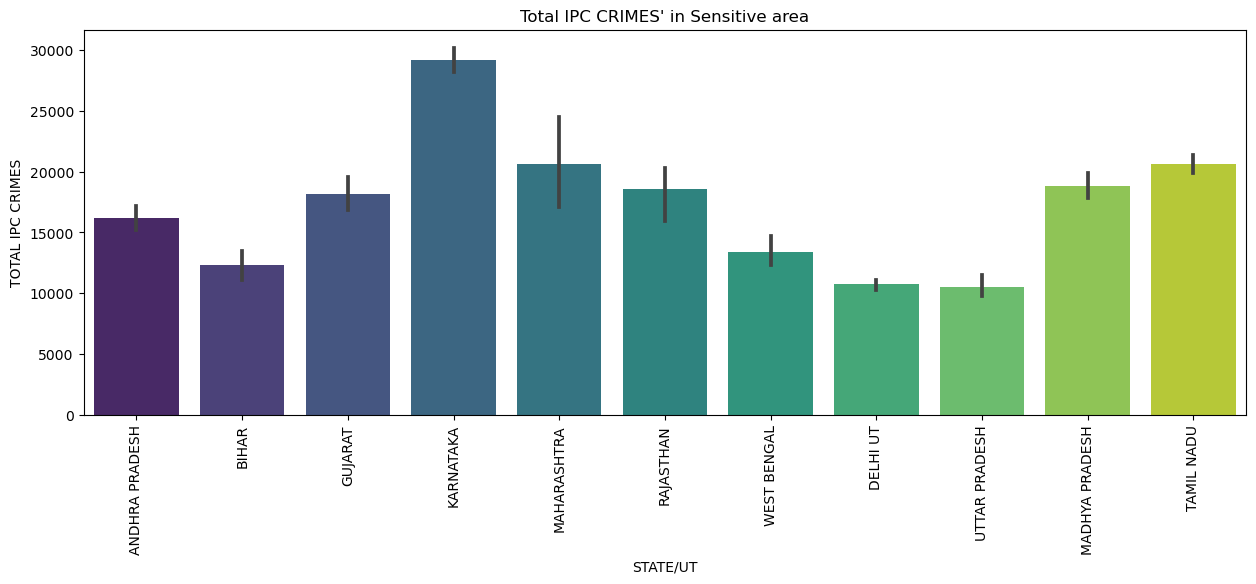

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=sensitivearea,palette='viridis')
plt.xticks(rotation='vertical')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.show()

Additionally looking for DISTRICTS

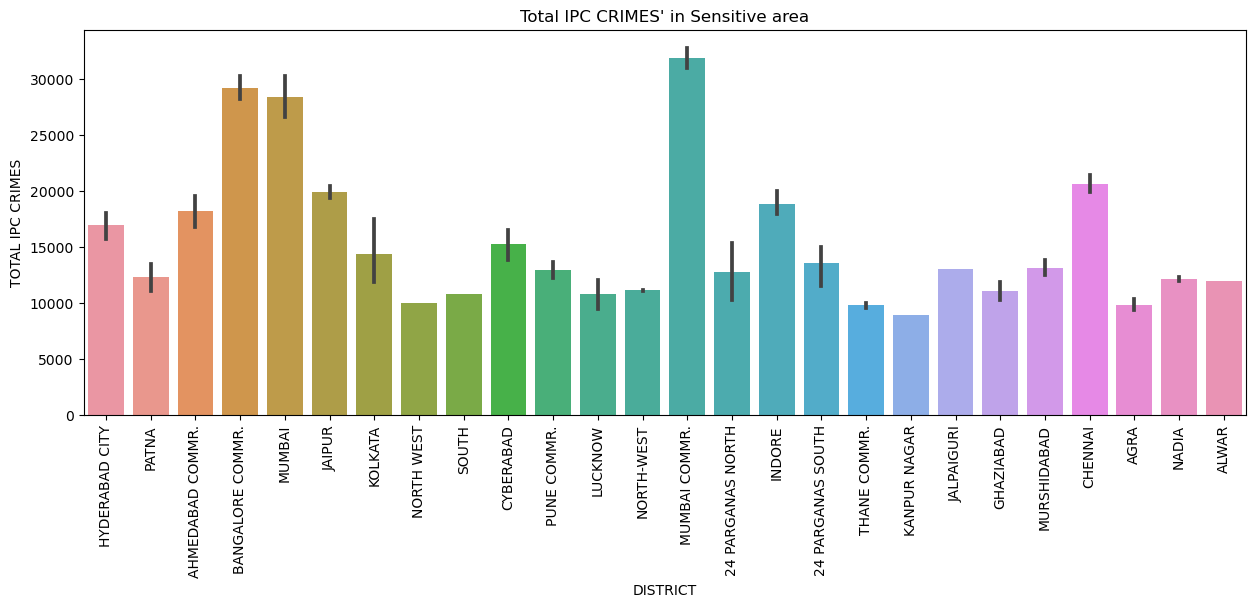

In [70]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='vertical')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.savefig('IPC CRIMES in Sensitive area.jpg')
plt.show()


Comparison Between Districts against Overall Crimes against Women

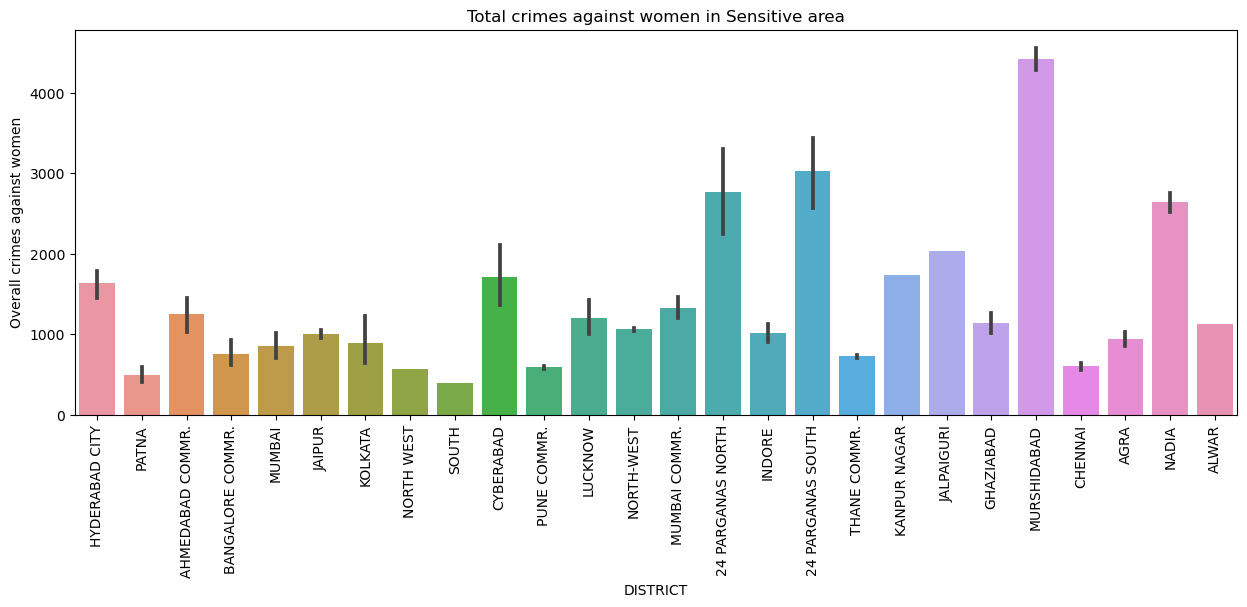

In [71]:

plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Overall crimes against women',data=sensitivearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against women in Sensitive area")

plt.savefig('Total crimes against women in Sensitive area.jpg')
plt.show()

West Bengal is home to the top three districts, which are Murshidabad, 24 Parganas South, and 24 Parganas North. This indicates that these districts of West Bengal for women, is by no means safe.

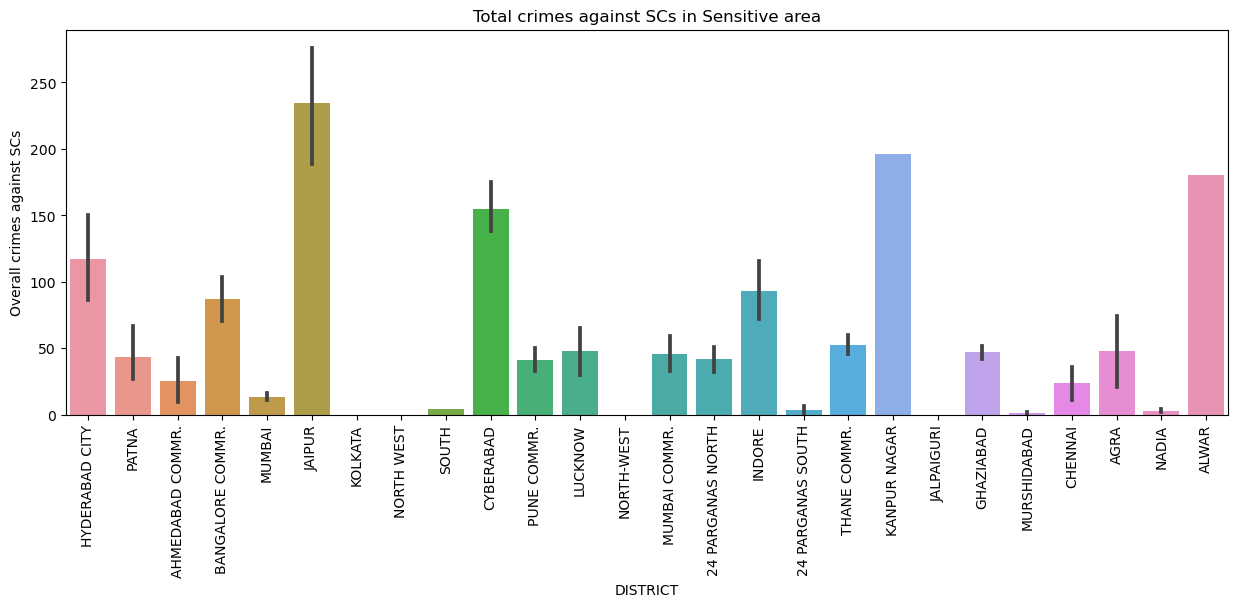

In [72]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Overall crimes against SCs',data=sensitivearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against SCs in Sensitive area")
plt.savefig('Total crimes against SCs in Sensitive area')
plt.show()

The biggest number of crimes against SCs in India occurs in Kanpur Nagar in Uttar Pradesh, and the districts of Jaipur and Alwar in Rajasthan State.

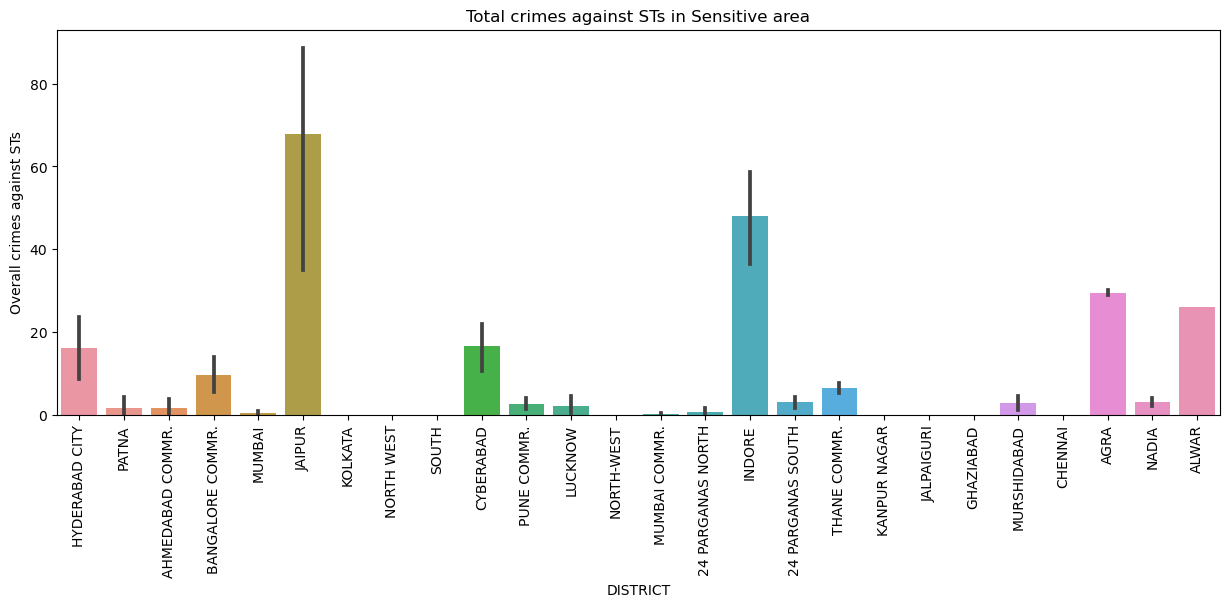

In [73]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Overall crimes against STs',data=sensitivearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against STs in Sensitive area")
plt.savefig('Total crimes against STs in Sensitive area')
plt.show()

Crimes against STs are more common in the districts of Jaipur, Rajasthan; Indore of Madhya Pradesh; and Agra, Uttar Pradesh.

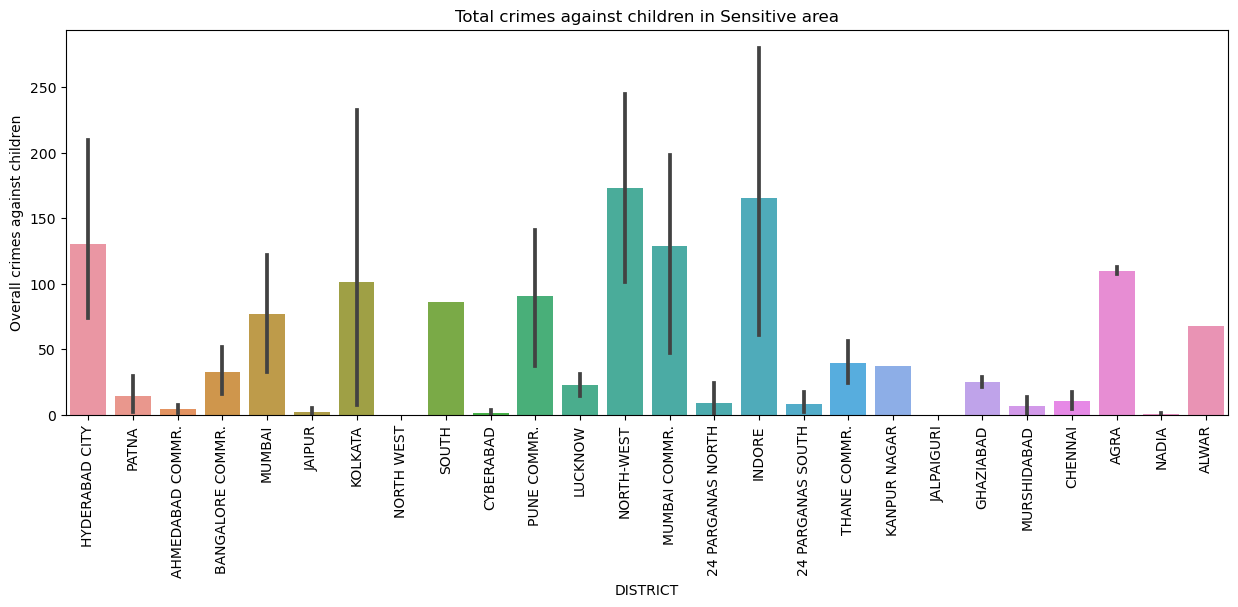

In [74]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Overall crimes against children',data=sensitivearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against children in Sensitive area")
plt.savefig('Total crimes against children in Sensitive area')

plt.show()


Crimes against children are most in the North-West District of Delhi, Indore, and Hyderabad City areas.
The largest states in India are Rajasthan, Madhya Pradesh, Uttar Pradesh, and Maharashtra. This is a major contributing factor to these states' highest crime rates.

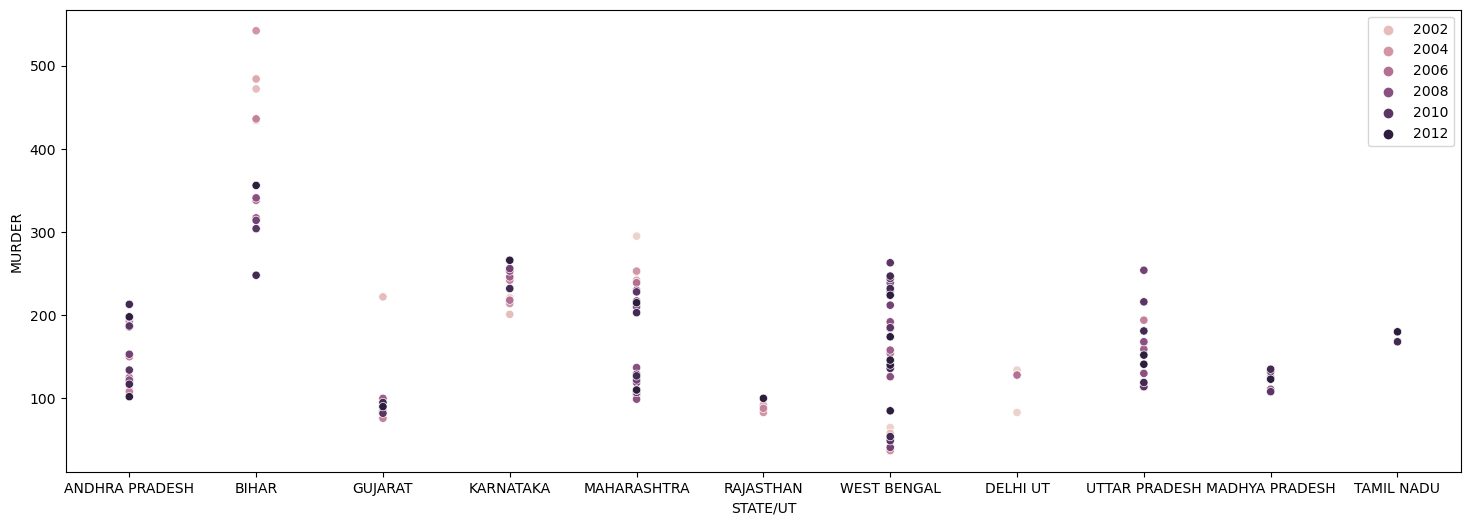

In [75]:
plt.figure(figsize=(18,6))
sns.scatterplot(x = "STATE/UT", y = "MURDER", data = sensitivearea,hue='YEAR')
plt.legend()
#plt.tight_layout()
plt.show()


In 2004, Bihar recorded the highest number of murder cases.

# Examining the trends for each sort of crime from 2001 to 2012.

Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

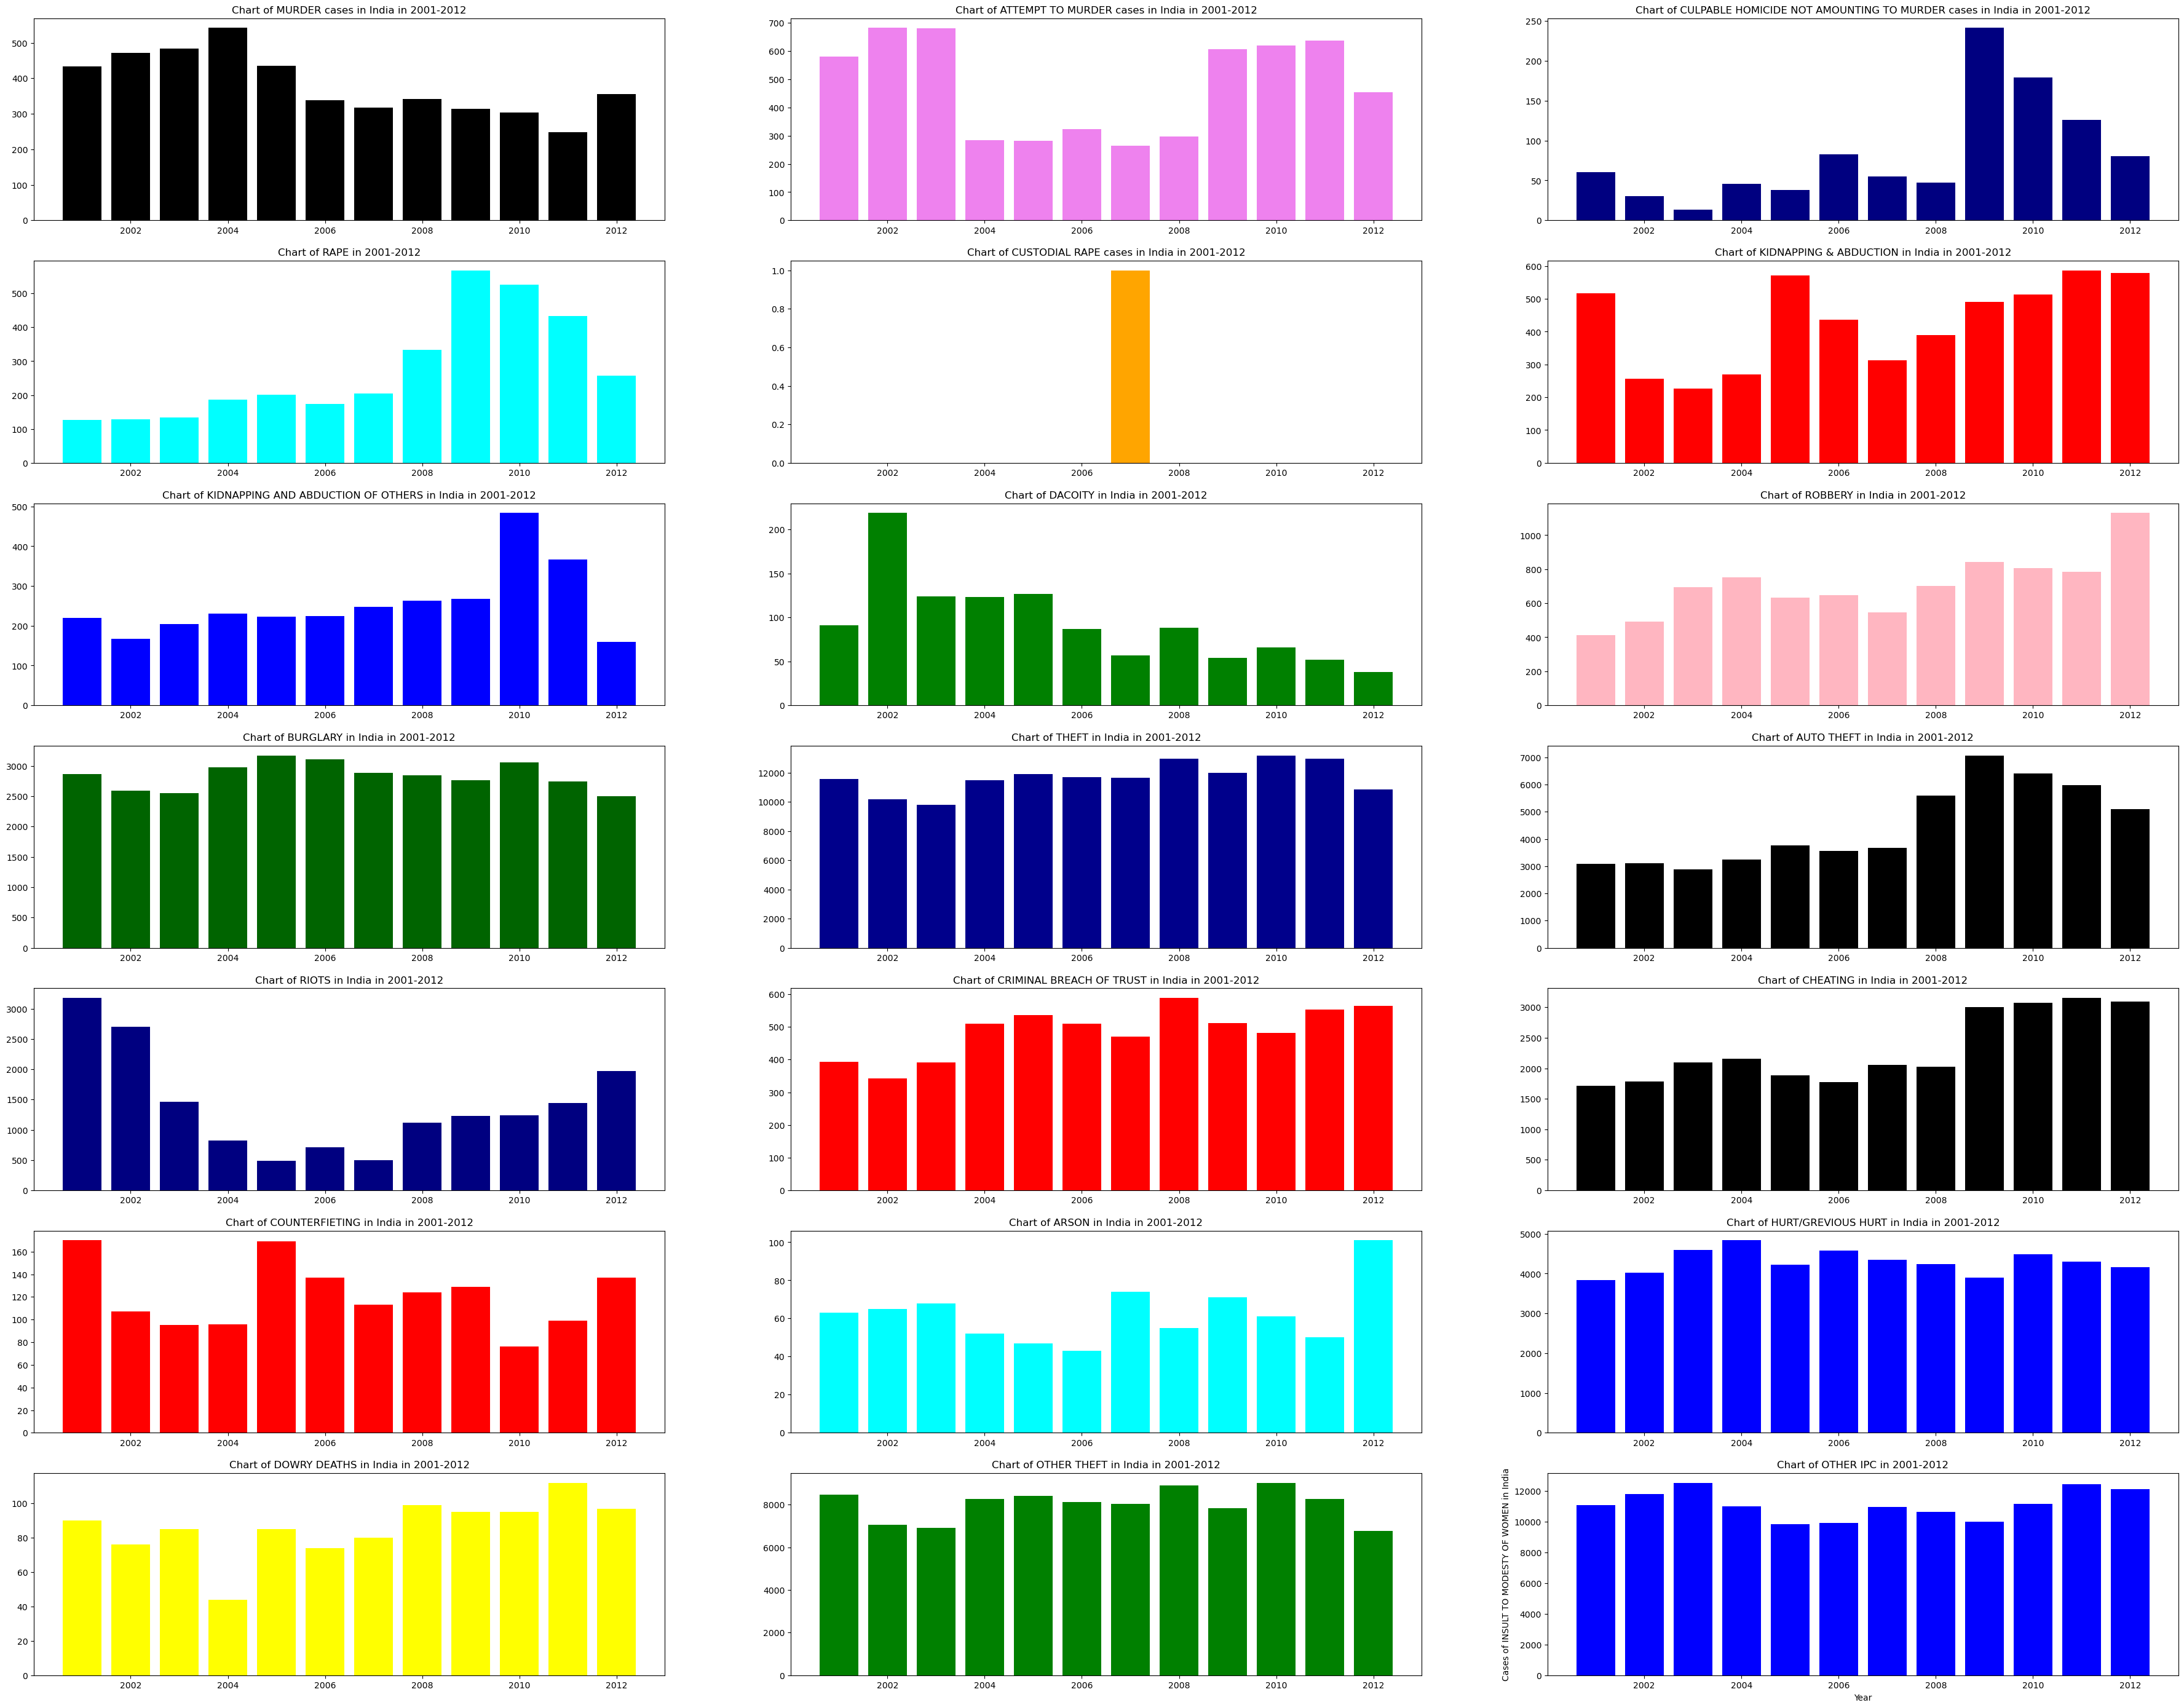

In [76]:
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(sensitivearea['YEAR'], sensitivearea['MURDER'], color = 'black');
plt.xlabel('YEAR') #(X-axis)
plt.ylabel('Cases of MURDER in India') #(Y-axis)

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(sensitivearea['YEAR'], sensitivearea['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #(Y-axis)

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(sensitivearea['YEAR'], sensitivearea['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #(Y-axis)

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(sensitivearea['YEAR'], sensitivearea['RAPE'], color = 'cyan');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of RAPE in India') #(Y-axis)

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(sensitivearea['YEAR'], sensitivearea['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('YEAR') #(X-axis)
plt.ylabel('Cases of CUSTODIAL RAPE in India') #(Y-axis)

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #(Y-axis)

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF OTHERS in India in 2001-2012")
axes[2,0].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING AND ABDUCTION OF OTHERS'], color = 'blue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF OTHERSin India') #(Y-axis)


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(sensitivearea['YEAR'], sensitivearea['DACOITY'], color = 'green');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of DACOITY in India') #(Y-axis)

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(sensitivearea['YEAR'], sensitivearea['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of ROBBERY in India') #(Y-axis)

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(sensitivearea['YEAR'], sensitivearea['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of BURGLARY in India') #(Y-axis)


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(sensitivearea['YEAR'], sensitivearea['THEFT'], color = 'darkblue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of THEFT in India') #(Y-axis)


axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(sensitivearea['YEAR'], sensitivearea['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of AUTO THEFT in India') #(Y-axis)


axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(sensitivearea['YEAR'], sensitivearea['RIOTS'], color = 'navy');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of RIOTS') #(Y-axis)

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(sensitivearea['YEAR'], sensitivearea['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #(Y-axis)


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(sensitivearea['YEAR'], sensitivearea['CHEATING'], color = 'black');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of CHEATING in India') #(Y-axis)

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(sensitivearea['YEAR'], sensitivearea['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of COUNTERFIETING in India') #(Y-axis)

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(sensitivearea['YEAR'], sensitivearea['ARSON'], color = 'cyan');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of ARSON in India') #(Y-axis)


axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(sensitivearea['YEAR'], sensitivearea['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #(Y-axis)

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(sensitivearea['YEAR'], sensitivearea['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of DOWRY DEATHS in India') #(Y-axis)

axes[6,1].set_title("Chart of OTHER THEFT in India in 2001-2012")
axes[6,1].bar(sensitivearea['YEAR'], sensitivearea['OTHER THEFT'], color = 'green');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of OTHER THEFT in India') #(Y-axis)

axes[6,2].set_title("Chart of OTHER IPC in 2001-2012")
axes[6,2].bar(sensitivearea['YEAR'], sensitivearea['OTHER IPC CRIMES'], color = 'blue');
plt.xlabel('Year') #(X-axis)
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #(Y-axis)

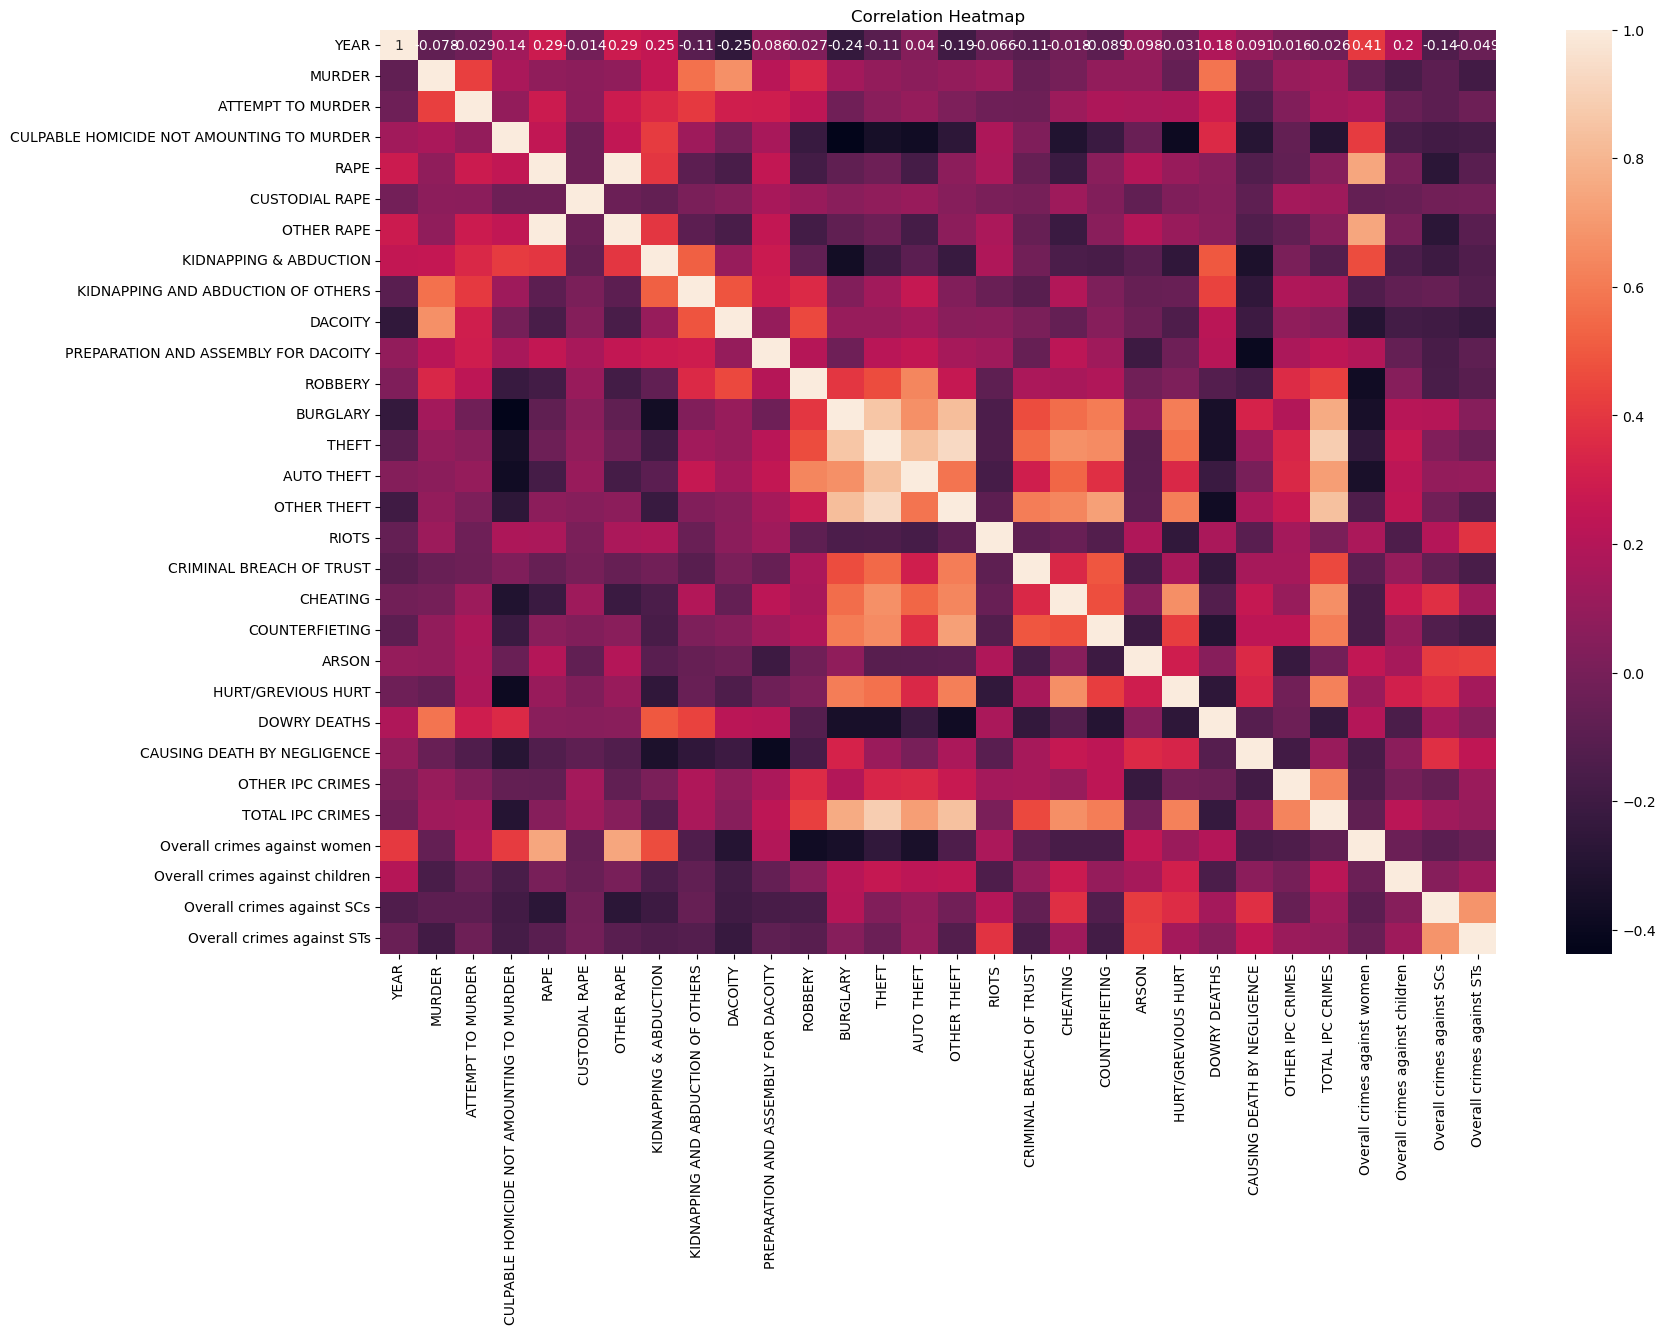

In [77]:
numeric_data = sensitivearea.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(18, 12))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.savefig('heatmap2.jpg')  # Save the plot before displaying it
plt.show()

Seaborn is used to construct the heatmap, which shows the correlation between the variables. The unique correlation between each feature and the other features in the dataset is displayed in the correlation matrix that was constructed.

When two variables have the following correlation:

0.0 to 0.3, their correlation is weak.
They have a moderate correlation (0.3–0.6).
0.6 to 0.9, indicating a strong correlation.
Ultimately, at >0.9, their correlation is extremely strong.

Positive and negative correlations show whether two variables are correlated directly or inversely; for example, a correlation of -0.7 between two variables means that, according to the preceding list, if one variable increases, the other one drops significantly.

It is evident from the heat map above that all crime categories, including murder, rape, and dowry deaths, have a positive correlation with the total number of IPC offenses.

Furthermore positively connected are kidnapping, abduction, and other rape/rape incidents.
There is a positive correlation between crime against SCs and crime against STs.

In [78]:
# Analysing the Moderate Region

In [79]:
pd.pivot_table(moderatearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Overall crimes against women', 'Overall crimes against children',
       'Overall crimes against SCs', 'Overall crimes against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#'Year' and 'State' features in a pivot table that illustrates a specific crime

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT      DISTRICT        YEAR                                           
A & N ISLANDS A and N ISLANDS 2007.0   11.0               19.0         8.0   
              ANDAMAN         2001.0    4.0                0.0         4.0   
                              2002.0    2.0                3.0         2.0   
                              2003.0    7.0                4.0         3.0   
                              2004.0    8.0                1.0         9.0   
...                                     ...                ...         ...   
WEST BENGAL   UTTAR DINAJPUR  2002.0    8.0               26.0        22.0   
                              2003.0    6.0                6.0        39.0   
                              2004.0    4.0               35.0        38.0   
                              2005.0   12.0               51.0        37.0   
                              2006.0   13.0               72.0        45.0   

                                      BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT      DISTRICT        YEAR                                            
A & N ISLANDS A and N ISLANDS 2007.0      90.0                          4.0   
              ANDAMAN         2001.0      62.0                          0.0   
                              2002.0      47.0                          0.0   
                              2003.0      56.0                          0.0   
                              2004.0      67.0                          6.0   
...                                        ...                          ...   
WEST BENGAL   UTTAR DINAJPUR  2002.0       6.0                        178.0   
                              2003.0       4.0                        157.0   
                              2004.0       3.0                        142.0   
                              2005.0       9.0                        200.0   
                              2006.0       5.0                          1.0   

                                      CHEATING  COUNTERFIETING  \
STATE/UT      DISTRICT        YEAR                               
A & N ISLANDS A and N ISLANDS 2007.0      23.0             1.0   
              ANDAMAN         2001.0       8.0             2.0   
                              2002.0      11.0             0.0   
                              2003.0      13.0             0.0   
                              2004.0      11.0             0.0   
...                                        ...             ...   
WEST BENGAL   UTTAR DINAJPUR  2002.0      10.0             3.0   
                              2003.0       8.0             0.0   
                              2004.0      13.0             7.0   
                              2005.0      17.0             3.0   
                              2006.0      16.0            13.0   

                                      CRIMINAL BREACH OF TRUST  \
STATE/UT      DISTRICT        YEAR                               
A & N ISLANDS A and N ISLANDS 2007.0                       7.0   
              ANDAMAN         2001.0                      10.0   
                              2002.0                       4.0   
                              2003.0                       1.0   
                              2004.0                       0.0   
...                                                        ...   
WEST BENGAL   UTTAR DINAJPUR  2002.0                      14.0   
                              2003.0                       5.0   
                              2004.0                       0.0   
                              2005.0                       1.0   
                              2006.0                       4.0   

                                      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT      DISTRICT        YEAR                                                
A & N ISLANDS A and N ISLANDS 2007.0                                        1.0   
              ANDAMAN       

In [80]:
print("We have {} Rows and {} Columns in our dataframe Moderate Area ".format(moderatearea.shape[0], moderatearea.shape[1]))

We have 6106 Rows and 33 Columns in our dataframe Moderate Area 


In [81]:
moderatearea['STATE/UT'].value_counts()

STATE/UT
UTTAR PRADESH        558
MADHYA PRADESH       368
ODISHA               364
TAMIL NADU           320
KARNATAKA            317
GUJARAT              317
JAMMU & KASHMIR      307
PUNJAB               284
BIHAR                283
MAHARASHTRA          277
ASSAM                260
RAJASTHAN            245
JHARKHAND            235
CHHATTISGARH         211
HARYANA              206
ARUNACHAL PRADESH    183
HIMACHAL PRADESH     164
UTTARAKHAND          149
WEST BENGAL          141
NAGALAND             126
MANIPUR              113
ANDHRA PRADESH        97
MIZORAM               96
KERALA                90
DELHI UT              86
MEGHALAYA             84
TRIPURA               51
SIKKIM                48
GOA                   24
A & N ISLANDS         24
DAMAN & DIU           24
PUDUCHERRY            18
CHANDIGARH            12
D & N HAVELI          12
LAKSHADWEEP           12
Name: count, dtype: int64

In [82]:
moderatearea['DISTRICT'].value_counts()

DISTRICT
G.R.P.           45
NORTH            36
RAILWAYS         35
SOUTH            25
HAMIRPUR         24
                 ..
RAILWAYS KMR      1
GUNTUR URBAN      1
WARANGAL          1
CRIME KASHMIR     1
CAR               1
Name: count, Length: 667, dtype: int64

In [83]:

moderatearea.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,6106.0,2006.486734,3.430208,2001.0,2004.00,2006.0,2009.00,2012.0
MURDER,6106.0,30.038323,23.025190,0.0,12.00,26.0,43.00,201.0
ATTEMPT TO MURDER,6106.0,24.366852,24.992363,0.0,6.00,18.0,34.00,269.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,6106.0,3.139371,5.825336,0.0,0.00,1.0,3.00,73.0
RAPE,6106.0,17.071405,16.572413,0.0,5.00,12.0,24.00,124.0
CUSTODIAL RAPE,6106.0,0.001310,0.036176,0.0,0.00,0.0,0.00,1.0
OTHER RAPE,6106.0,17.070095,16.572428,0.0,5.00,12.0,24.00,124.0
KIDNAPPING & ABDUCTION,6106.0,22.221749,21.960562,0.0,6.00,16.0,32.00,177.0
KIDNAPPING AND ABDUCTION OF OTHERS,6106.0,5.273338,7.279523,0.0,1.00,3.0,7.00,104.0
DACOITY,6106.0,4.367180,6.538574,0.0,0.00,2.0,6.00,76.0


The minimum and maximum of each crime—murder, rape, IPC, TOTAL IPC CRIMES, total crime against women, and crime against STs and SCs are displayed. These are the data from 2001 to 2012. In this cluster, maximum value is less than the sensitive area cluster's maximum value.

State/UT versus all IPC offenses

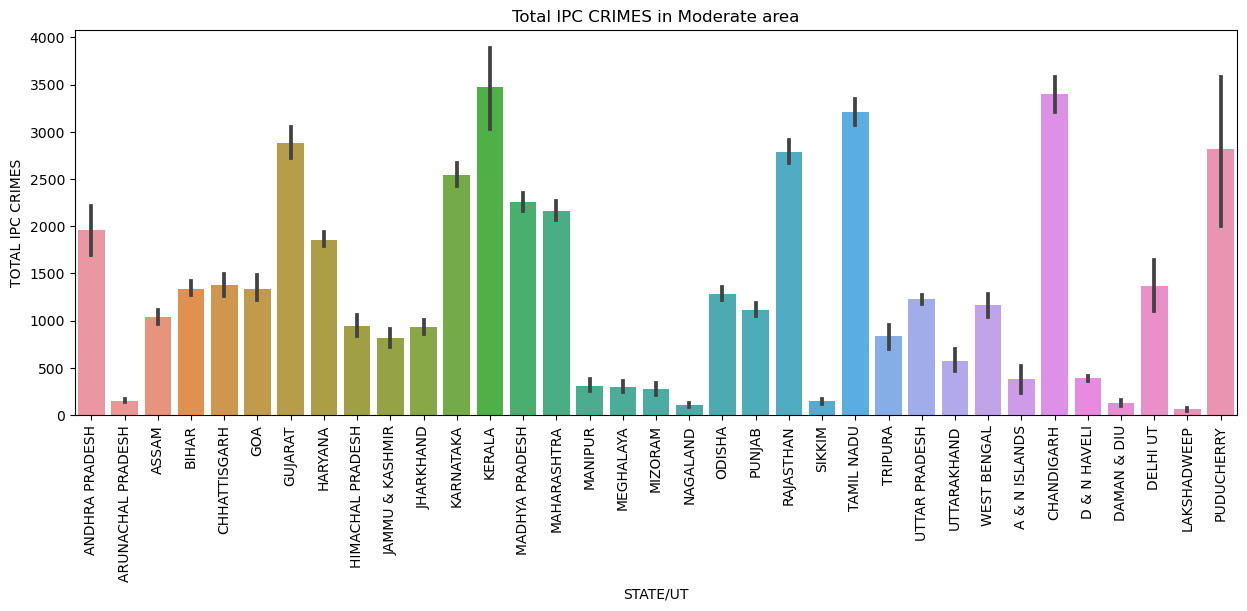

In [84]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=moderatearea)
plt.xticks(rotation='vertical')
plt.title("Total IPC CRIMES in Moderate area")
plt.savefig('Total IPC CRIMES in Moderate area.jpg')
plt.show()

Total Crimes Against Women versus State/UT

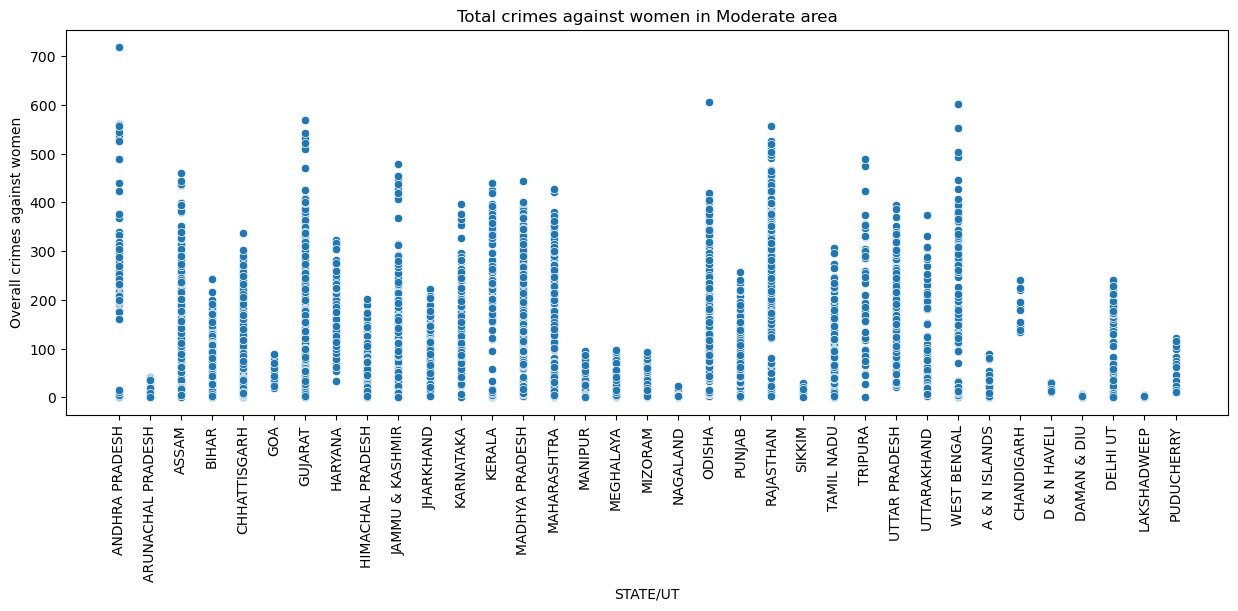

In [85]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Overall crimes against women',data=moderatearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against women in Moderate area")
plt.savefig('Total crimes against women in Moderate area.jpg')
plt.show()

Total crimes against SCs vs. State/UT


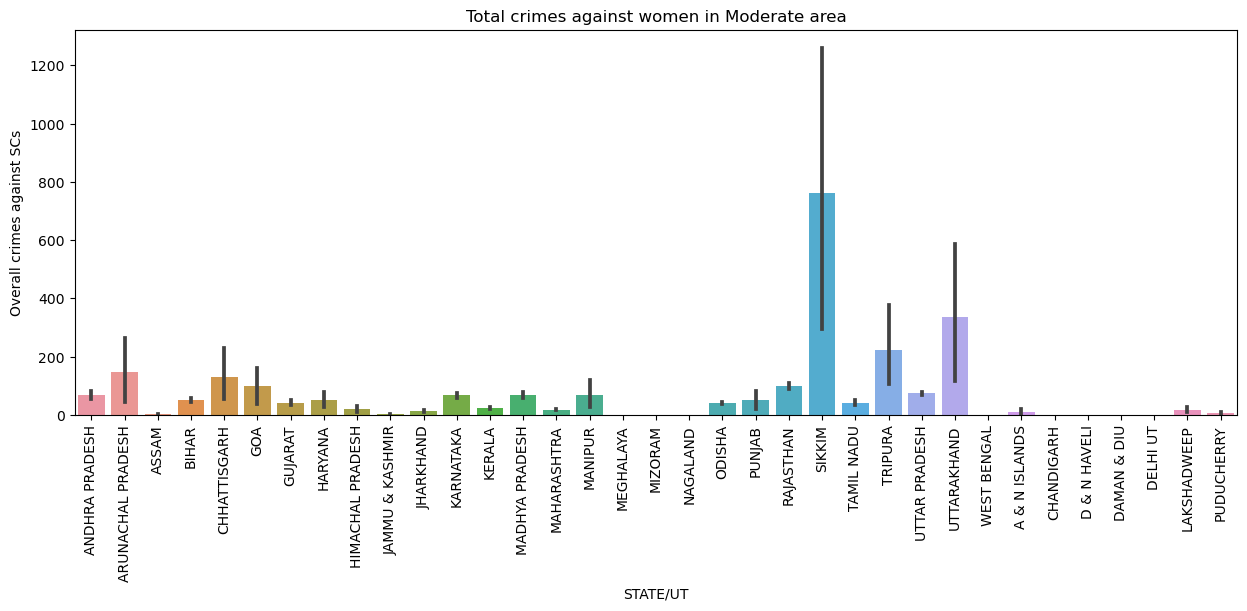

In [86]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Overall crimes against SCs',data=moderatearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against women in Moderate area")
plt.savefig('Total crimes against women in Moderate area.jpg')
plt.show()

Total offenses against STs vs. State/UT

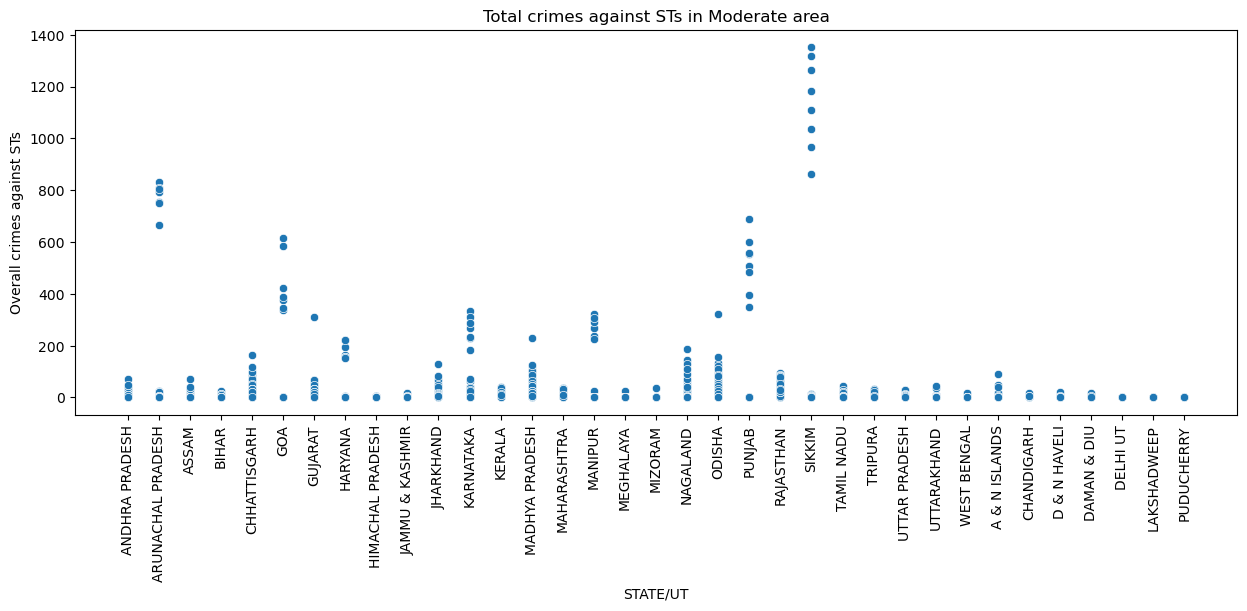

In [87]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Overall crimes against STs',data=moderatearea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against STs in Moderate area")
plt.savefig('Total crimes against STs in Moderate area.jpg')

plt.show()

All states, with the exception of sikkim, have lower crime rates against Scheduled Tribes (STs). This is because our region is moderate, meaning that districts fall into neither the peaceful nor the violent categories.

In [90]:
moderatearea.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
A and N ISLANDS,A & N ISLANDS,2007.0,15.0,19.0,1.0,3.0,0.0,3.0,12.0,3.0,...,99.0,1.0,4.0,337.0,807.0,54.0,10.0,3,5,2
AHMEDABAD RURAL,GUJARAT,2001.0,19.0,4.0,0.0,3.0,0.0,3.0,13.0,0.0,...,236.0,0.0,183.0,797.0,2146.0,96.0,0.0,0,0,2
AHWA-DANG,GUJARAT,2001.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,10.0,43.0,104.0,3.0,16.0,0,0,2
AIZAWL,MIZORAM,2001.0,4.0,4.0,0.0,6.0,0.0,6.0,0.0,0.0,...,11.0,0.0,0.0,94.0,534.0,22.0,0.0,0,0,2
AKOLA,MAHARASHTRA,2001.0,38.0,34.0,0.0,15.0,0.0,15.0,15.0,0.0,...,720.0,1.0,116.0,998.0,3442.0,261.0,16.0,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST,SIKKIM,2001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,4.0,50.0,3.0,0.0,0,0,2
WOKHA,NAGALAND,2001.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,4.0,47.0,0.0,0.0,0,0,2
YADGIRI,KARNATAKA,2010.0,23.0,21.0,0.0,5.0,0.0,5.0,20.0,2.0,...,289.0,0.0,5.0,449.0,1486.0,123.0,25.0,4,0,2


Investigating the region with the greatest total theft and rioting numbers.

In [91]:
moderatearea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
CRIME KASHMIR        0.0
EOW                  0.0
CAW                  0.0
RAILWAYS KMR         0.0
BIEO                 0.0
                  ...   
BHOPAL RLY.      12301.0
CENTRAL          14184.0
CHANDIGARH       18474.0
MUMBAI RLY.      21604.0
G.R.P.           26817.0
Name: THEFT, Length: 667, dtype: float64

In [92]:
moderatearea.loc[moderatearea['DISTRICT'] == 'SOUTH'].max()

STATE/UT                                     TRIPURA
DISTRICT                                       SOUTH
YEAR                                          2012.0
MURDER                                          42.0
ATTEMPT TO MURDER                               35.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER        4.0
RAPE                                            58.0
CUSTODIAL RAPE                                   0.0
OTHER RAPE                                      58.0
KIDNAPPING & ABDUCTION                          34.0
KIDNAPPING AND ABDUCTION OF OTHERS              13.0
DACOITY                                          6.0
PREPARATION AND ASSEMBLY FOR DACOITY             1.0
ROBBERY                                         41.0
BURGLARY                                        65.0
THEFT                                          150.0
AUTO THEFT                                      21.0
OTHER THEFT                                    136.0
RIOTS                                         

In [93]:
moderatearea.groupby('DISTRICT')['RIOTS'].sum().sort_values()

DISTRICT
CID                    0.0
SBS NAGAR              0.0
SAS NGR                0.0
SANGRUR                0.0
JODHPUR EAST           0.0
                     ...  
KOZHIKODE COMMR.    3397.0
CHITRADURGA         3401.0
PATHANAMTHITTA      3433.0
BIJAPUR             3567.0
KASARGOD            3996.0
Name: RIOTS, Length: 667, dtype: float64

In [94]:
moderatearea.loc[moderatearea['DISTRICT'] == 'KANNUR'].max()

STATE/UT                                     KERALA
DISTRICT                                     KANNUR
YEAR                                         2005.0
MURDER                                         28.0
ATTEMPT TO MURDER                              63.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER      12.0
RAPE                                           33.0
CUSTODIAL RAPE                                  0.0
OTHER RAPE                                     33.0
KIDNAPPING & ABDUCTION                         14.0
KIDNAPPING AND ABDUCTION OF OTHERS              6.0
DACOITY                                         8.0
PREPARATION AND ASSEMBLY FOR DACOITY            0.0
ROBBERY                                        17.0
BURGLARY                                      242.0
THEFT                                         197.0
AUTO THEFT                                     94.0
OTHER THEFT                                   113.0
RIOTS                                         616.0
CRIMINAL BRE

In [95]:
moderatearea['STATE/UT'].value_counts()

STATE/UT
UTTAR PRADESH        558
MADHYA PRADESH       368
ODISHA               364
TAMIL NADU           320
KARNATAKA            317
GUJARAT              317
JAMMU & KASHMIR      307
PUNJAB               284
BIHAR                283
MAHARASHTRA          277
ASSAM                260
RAJASTHAN            245
JHARKHAND            235
CHHATTISGARH         211
HARYANA              206
ARUNACHAL PRADESH    183
HIMACHAL PRADESH     164
UTTARAKHAND          149
WEST BENGAL          141
NAGALAND             126
MANIPUR              113
ANDHRA PRADESH        97
MIZORAM               96
KERALA                90
DELHI UT              86
MEGHALAYA             84
TRIPURA               51
SIKKIM                48
GOA                   24
A & N ISLANDS         24
DAMAN & DIU           24
PUDUCHERRY            18
CHANDIGARH            12
D & N HAVELI          12
LAKSHADWEEP           12
Name: count, dtype: int64

The biggest number of districts are found in the moderate areas of Uttar Pradesh, Maharashtra, Andhra Pradesh, and Bihar; Tripura, Jammu & Kashmir, on the other hand, have only appeared three or four times. States like Tripura and Jammu & Kashmir are like tranquil states, but states like Uttar Pradesh, Maharashtra, Andhra Pradesh, and Bihar are extremely prone to crimes in a moderate area.

Peaceful Area Cluster Analysis

In [96]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Overall crimes against women', 'Overall crimes against children',
       'Overall crimes against SCs', 'Overall crimes against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#'Year' and 'State' features in a pivot table that illustrates a specific crim

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT    YEAR                                           
ANDHRA PRADESH CYBERABAD   2005.0   37.0               88.0       563.0   
                           2006.0   43.0               92.0       642.0   
                           2007.0   74.0               84.0      1124.0   
                           2008.0   42.0               66.0      1202.0   
                           2009.0   71.0               84.0      1365.0   
...                                  ...                ...         ...   
WEST BENGAL    MURSHIDABAD 2010.0   54.0              620.0       204.0   
                           2011.0   45.0              637.0       186.0   
                           2012.0   50.0              395.0       309.0   
               NADIA       2011.0   13.0              375.0       243.0   
                           2012.0   22.0              357.0       244.0   

                                   BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT    YEAR                                            
ANDHRA PRADESH CYBERABAD   2005.0    1139.0                        898.0   
                           2006.0    1321.0                       1064.0   
                           2007.0    1165.0                       1188.0   
                           2008.0    1319.0                       1166.0   
                           2009.0    1348.0                       1063.0   
...                                     ...                          ...   
WEST BENGAL    MURSHIDABAD 2010.0       7.0                        311.0   
                           2011.0      13.0                        290.0   
                           2012.0       4.0                        347.0   
               NADIA       2011.0      20.0                        156.0   
                           2012.0      21.0                        285.0   

                                   CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0     950.0             5.0   
                           2006.0    1275.0             6.0   
                           2007.0    1192.0             5.0   
                           2008.0    1183.0             6.0   
                           2009.0    1174.0            13.0   
...                                     ...             ...   
WEST BENGAL    MURSHIDABAD 2010.0     170.0            30.0   
                           2011.0     189.0            27.0   
                           2012.0     157.0           110.0   
               NADIA       2011.0     291.0            11.0   
                           2012.0     338.0            21.0   

                                   CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0                      83.0   
                           2006.0                     156.0   
                           2007.0                     103.0   
                           2008.0                     103.0   
                           2009.0                     124.0   
...                                                     ...   
WEST BENGAL    MURSHIDABAD 2010.0                      54.0   
                           2011.0                      96.0   
                           2012.0                      92.0   
               NADIA       2011.0                      99.0   
                           2012.0                     132.0   

                                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT    YEAR                                                
ANDHRA PRADESH CYBERABAD   2005.0                                       10.0   
                           2006.0                                       11.0   
                           2007.0                                        8.0   
                           200

In [97]:
print("We have {} Rows and {} Columns in our dataframe Peaceful Area ".format(peacefularea.shape[0], peacefularea.shape[1]))

We have 2350 Rows and 33 Columns in our dataframe Peaceful Area 


In [99]:
peacefularea['STATE/UT'].value_counts()

STATE/UT
UTTAR PRADESH      295
MADHYA PRADESH     242
ANDHRA PRADESH     241
MAHARASHTRA        238
BIHAR              233
RAJASTHAN          191
TAMIL NADU         135
KERALA             131
WEST BENGAL        128
ASSAM               90
DELHI UT            81
JHARKHAND           65
KARNATAKA           58
ODISHA              54
HARYANA             50
GUJARAT             43
CHHATTISGARH        43
PUNJAB              18
UTTARAKHAND          7
TRIPURA              4
JAMMU & KASHMIR      3
Name: count, dtype: int64

In [100]:
peacefularea['DISTRICT'].value_counts()

DISTRICT
WEST              16
ADILABAD          12
MALAPPURAM        12
JABALPUR          12
GWALIOR           12
                  ..
DEHRADUN           1
SRIKAKULAM         1
WARANGAL URBAN     1
DAMOH              1
CENTRAL            1
Name: count, Length: 337, dtype: int64

In [101]:
peacefularea.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,2350.0,2006.963404,3.523735,2001.0,2004.00,2007.0,2010.00,2012.0
MURDER,2350.0,82.932766,42.910767,4.0,53.25,75.0,103.00,324.0
ATTEMPT TO MURDER,2350.0,76.701702,61.455906,0.0,38.00,61.0,96.75,741.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,2350.0,9.668511,13.323093,0.0,1.00,4.0,13.00,148.0
RAPE,2350.0,51.312340,33.444430,2.0,28.00,44.0,64.75,369.0
CUSTODIAL RAPE,2350.0,0.007234,0.138220,0.0,0.00,0.0,0.00,5.0
OTHER RAPE,2350.0,51.305106,33.435388,2.0,28.00,44.0,64.75,369.0
KIDNAPPING & ABDUCTION,2350.0,80.751489,68.542253,1.0,35.00,63.0,103.00,577.0
KIDNAPPING AND ABDUCTION OF OTHERS,2350.0,21.211489,27.468221,0.0,6.00,14.0,26.00,258.0
DACOITY,2350.0,12.293191,14.436824,0.0,3.00,7.0,16.00,112.0


# We have the lowest values for each state's peaceful area, which indicates that the dataset's crime rate is the lowest, as shown by the describe method.



State/UT versus all IPC offenses

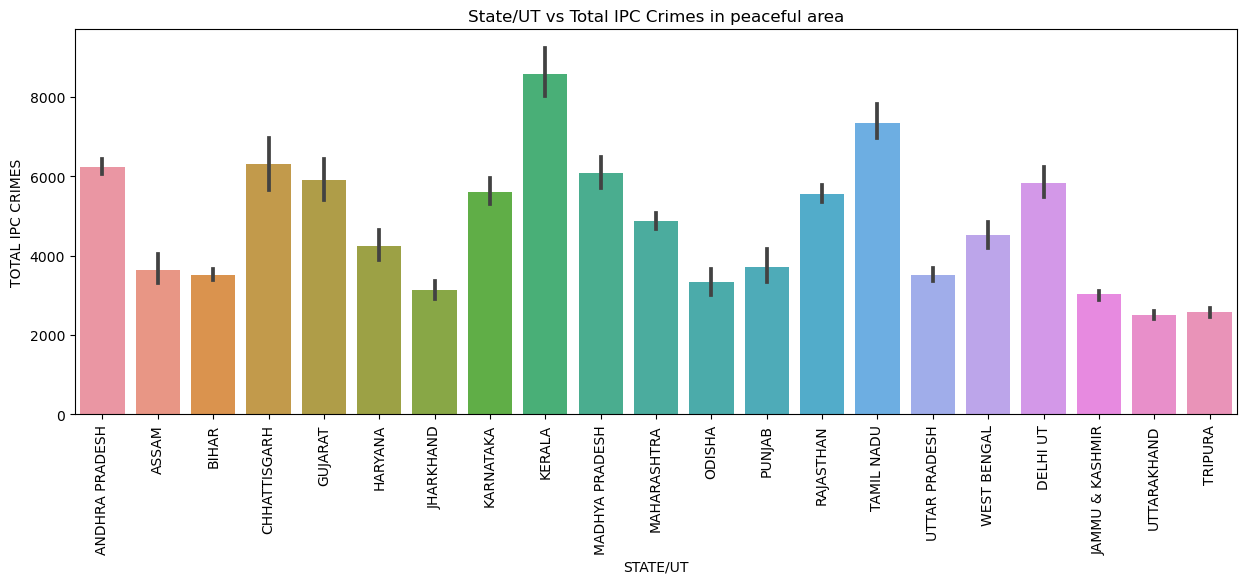

In [102]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=peacefularea)
plt.xticks(rotation='vertical')
plt.title('State/UT vs Total IPC Crimes in peaceful area')
plt.savefig('Total IPC Crimes in peaceful area.jpg')
plt.show()

Kerala, Tamil Nadu, Chandigarh, Karnataka and Andhra Pradesh are the states with the highest numbers of Total IPC offenses in Peaceful Area.

The states with the lowest number of total IPC crimes are Arunachal Pradesh, Manipur, Meghalaya, Mizoram, Nagaland, and Sikkim.

Total Crimes against Women vs State/UT

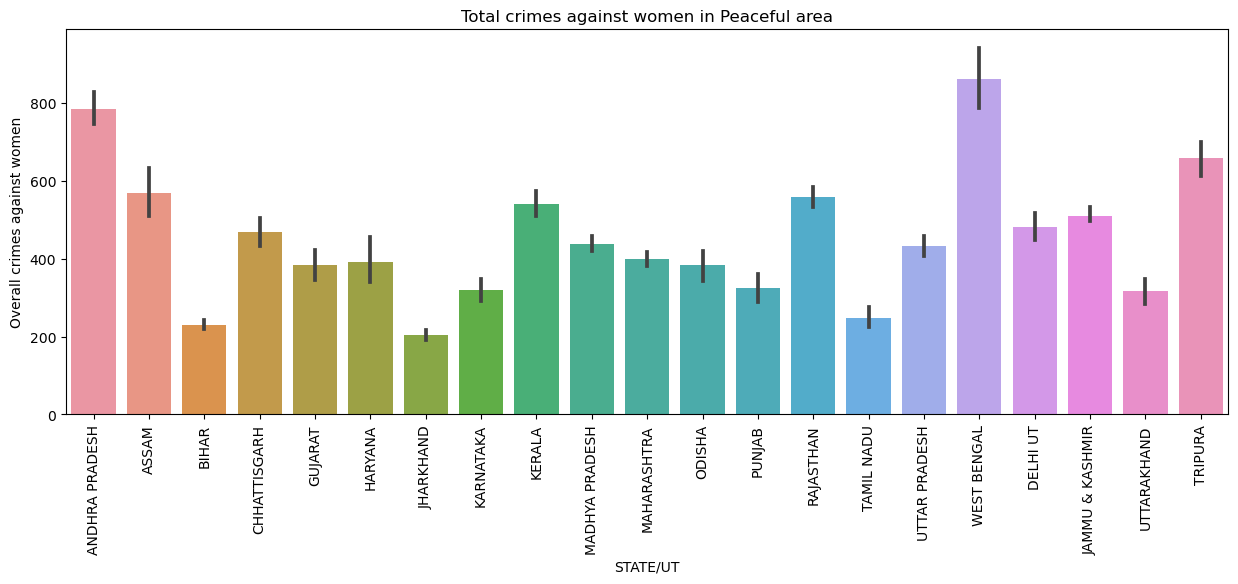

In [103]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Overall crimes against women',data=peacefularea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against women in Peaceful area")
plt.savefig('crime agains women inoeacefula area')
plt.show()

Kerala, Madhya Pradesh, Rajasthan, Andhra Pradesh, and Maharashtra are the states with the highest rate of crime.

Arunachal Pradesh, Mizoram, Meghalaya, and Manipur are the states with the lowest rates of crimes against women.

One point is noted here: before this analysis, Manipur, Meghalaya, and Mizoram states were not displaying a lot of data, especially in the Sensitive Area Dataframe.

Total crimes against SCs vs. State/UT

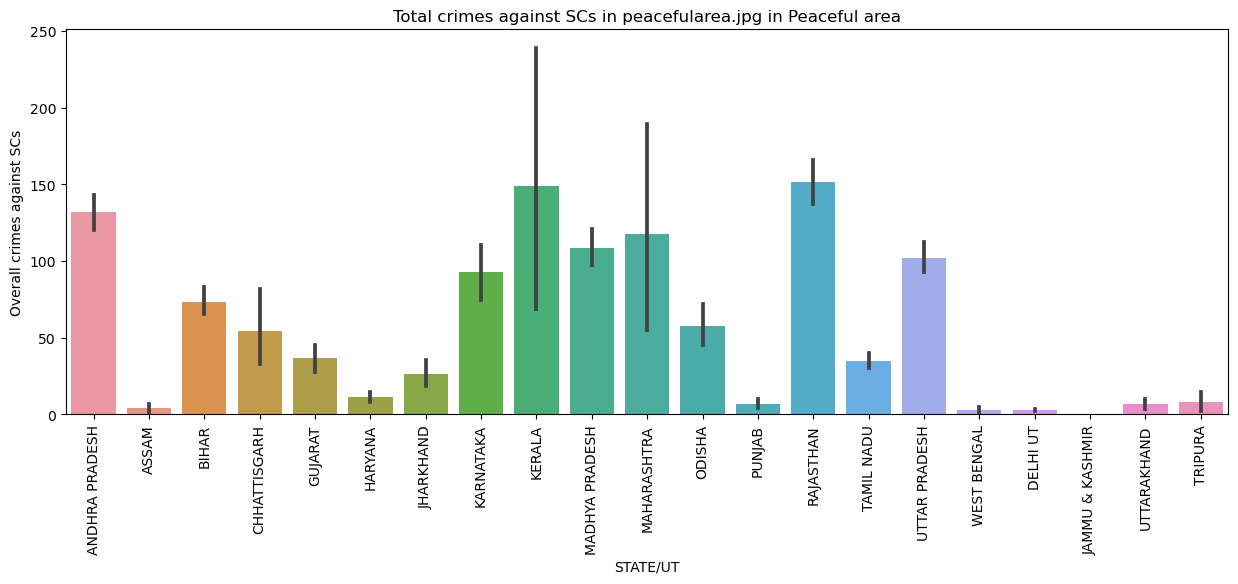

In [104]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Overall crimes against SCs',data=peacefularea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against SCs in peacefularea.jpg in Peaceful area")
plt.savefig('crimes against SCs in peacefularea.jpg')
plt.show()

Rajasthan have the highest total crime rates against SCs, while other states have relatively low total crime rates against SCs.


Total offenses against STs vs. State/UT

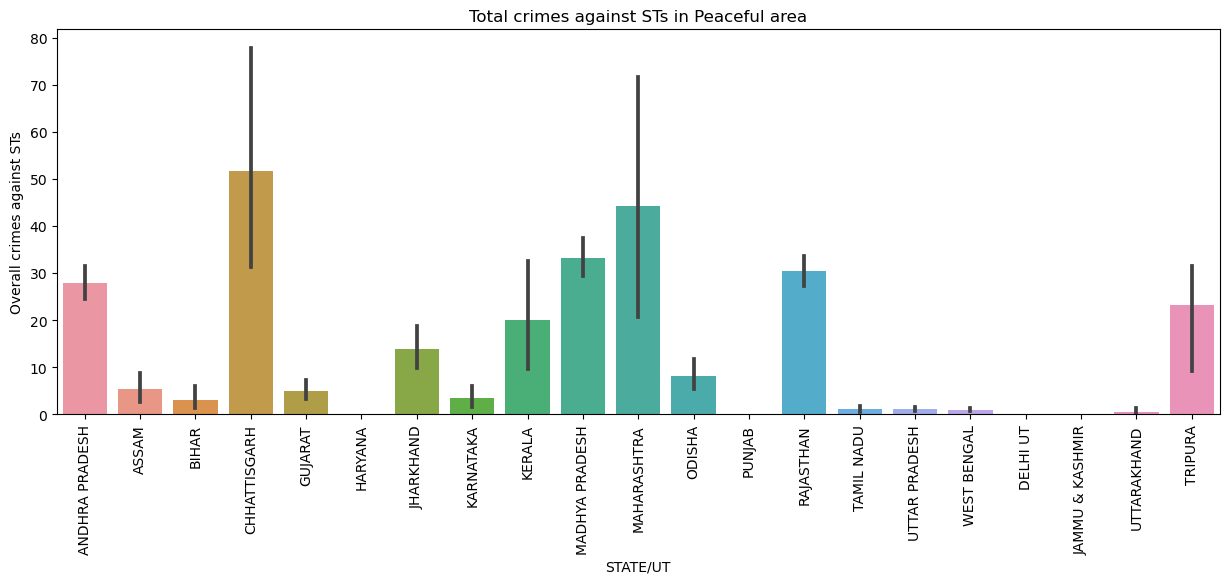

In [106]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Overall crimes against STs',data=peacefularea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against STs in Peaceful area")
plt.savefig('crimes against STs in Peaceful area')
plt.show()

State/UT versus all offenses committed against Children


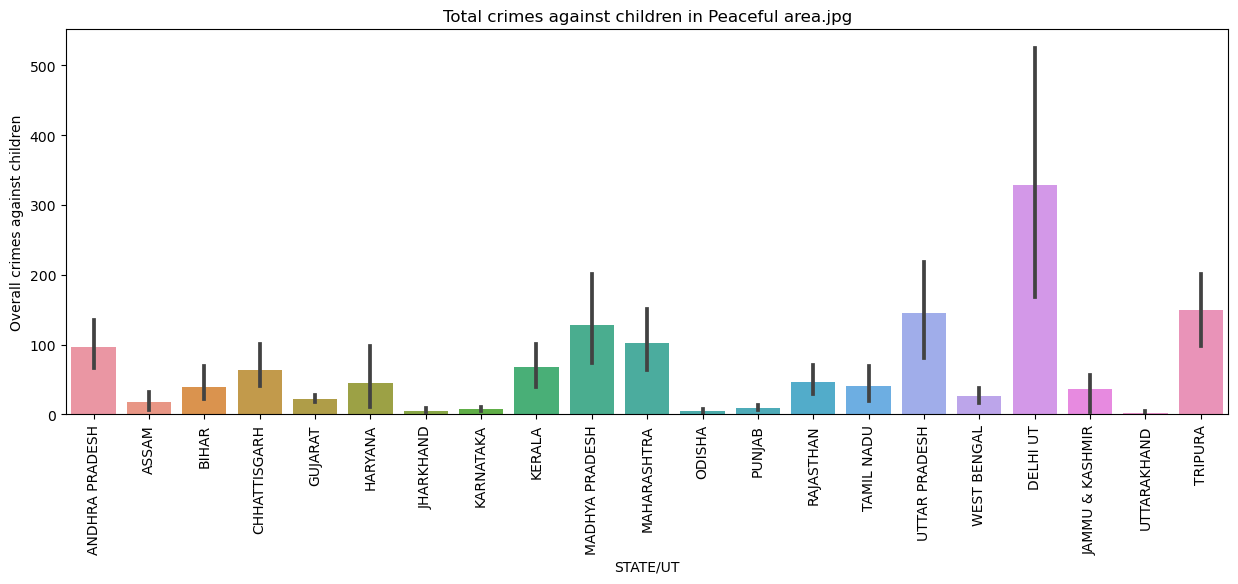

In [107]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Overall crimes against children',data=peacefularea)
plt.xticks(rotation='vertical')
plt.title("Total crimes against children in Peaceful area.jpg")
plt.show()

In a 12-year period (2001–2012), the states with data that are below 300 include Delhi UT, Madhya Pradesh, and Maharashtra.

Mizoram, Manipur, Meghalaya, and Arunchal Pradesh have the lowest total numbers of crimes against Chinese children.

In [108]:
peacefularea.groupby('DISTRICT').min()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Overall crimes against women,Overall crimes against children,Overall crimes against SCs,Overall crimes against STs,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2001.0,168.0,6.0,38.0,53.0,0.0,53.0,81.0,0.0,...,0.0,23.0,0.0,3036.0,6167.0,649.0,0.0,0,0,1
24 PARGANAS SOUTH,WEST BENGAL,2001.0,107.0,2.0,34.0,47.0,0.0,47.0,53.0,1.0,...,0.0,43.0,0.0,3211.0,5827.0,681.0,0.0,0,0,1
ADILABAD,ANDHRA PRADESH,2001.0,73.0,39.0,8.0,35.0,0.0,35.0,41.0,6.0,...,1044.0,5.0,181.0,881.0,4154.0,454.0,0.0,14,0,1
AGRA,UTTAR PRADESH,2001.0,109.0,116.0,18.0,26.0,0.0,26.0,99.0,26.0,...,360.0,38.0,40.0,896.0,3438.0,452.0,13.0,3,0,1
AHMEDNAGAR,MAHARASHTRA,2001.0,81.0,38.0,0.0,41.0,0.0,41.0,25.0,7.0,...,575.0,0.0,445.0,975.0,4251.0,404.0,6.0,13,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WARANGAL URBAN,ANDHRA PRADESH,2011.0,46.0,10.0,5.0,35.0,0.0,35.0,55.0,40.0,...,499.0,26.0,230.0,1730.0,3797.0,271.0,2213.0,94,57,1
WARDHA,MAHARASHTRA,2008.0,36.0,27.0,3.0,26.0,0.0,26.0,26.0,4.0,...,744.0,2.0,176.0,1197.0,3882.0,333.0,27.0,17,18,1
WEST,DELHI UT,2001.0,46.0,14.0,0.0,44.0,0.0,44.0,48.0,6.0,...,210.0,6.0,4.0,641.0,2420.0,228.0,0.0,1,0,1


In [109]:
peacefularea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
KANDHAMAL           45.0
BANKA              111.0
DAMOH              142.0
TIKAMGARH          172.0
SAHARSA            194.0
                  ...   
BHOPAL           25093.0
NAGPUR COMMR.    27488.0
WEST             27905.0
EAST             29165.0
SOUTH            33247.0
Name: THEFT, Length: 337, dtype: float64

In [110]:
peacefularea[peacefularea['DISTRICT']=='G.R.P.'].max()

STATE/UT                                     UTTAR PRADESH
DISTRICT                                            G.R.P.
YEAR                                                2011.0
MURDER                                                30.0
ATTEMPT TO MURDER                                     14.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              9.0
RAPE                                                   2.0
CUSTODIAL RAPE                                         0.0
OTHER RAPE                                             2.0
KIDNAPPING & ABDUCTION                                13.0
KIDNAPPING AND ABDUCTION OF OTHERS                     7.0
DACOITY                                               30.0
PREPARATION AND ASSEMBLY FOR DACOITY                   4.0
ROBBERY                                              216.0
BURGLARY                                               1.0
THEFT                                               3043.0
AUTO THEFT                                            90

In 2012, the G.R.P. district in Uttar Pradesh had the highest number of thefts.

In [111]:
peacefularea['DISTRICT'].max()

'YAVATMAL'

After determining the maximum values for each offense in the dataframe, which are displayed below, YAVATMAL of MAHARASTRA is the DISTRICT that appeared the most in the dataframe.

In [112]:
peacefularea[peacefularea['DISTRICT']=='YAVATMAL'].max()

STATE/UT                                     MAHARASHTRA
DISTRICT                                        YAVATMAL
YEAR                                              2012.0
MURDER                                              84.0
ATTEMPT TO MURDER                                   87.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER           13.0
RAPE                                                66.0
CUSTODIAL RAPE                                       0.0
OTHER RAPE                                          66.0
KIDNAPPING & ABDUCTION                              65.0
KIDNAPPING AND ABDUCTION OF OTHERS                   8.0
DACOITY                                             10.0
PREPARATION AND ASSEMBLY FOR DACOITY                 7.0
ROBBERY                                             94.0
BURGLARY                                           342.0
THEFT                                             1253.0
AUTO THEFT                                         205.0
OTHER THEFT                    

In [113]:
peacefularea['DISTRICT'].min()

'24 PARGANAS NORTH'

In [114]:
peacefularea[peacefularea['DISTRICT']==' 24 PARGANAS NORTH'].max()

STATE/UT                                     NaN
DISTRICT                                     NaN
YEAR                                         NaN
MURDER                                       NaN
ATTEMPT TO MURDER                            NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    NaN
RAPE                                         NaN
CUSTODIAL RAPE                               NaN
OTHER RAPE                                   NaN
KIDNAPPING & ABDUCTION                       NaN
KIDNAPPING AND ABDUCTION OF OTHERS           NaN
DACOITY                                      NaN
PREPARATION AND ASSEMBLY FOR DACOITY         NaN
ROBBERY                                      NaN
BURGLARY                                     NaN
THEFT                                        NaN
AUTO THEFT                                   NaN
OTHER THEFT                                  NaN
RIOTS                                        NaN
CRIMINAL BREACH OF TRUST                     NaN
CHEATING            

Silhouette score

In [116]:
from sklearn.metrics import silhouette_score

In [117]:
silhouette_score(X,y_kmeans)#cluster and information

0.42531486965672766

4.3 Analyzing our clusters and writing a report outlining all of our observations.

States in the sensitive area: 32 columns total and 140 rows overall

According to this Cluster, every state has the greatest crime rate.West Bengal, Maharashtra, Andhra Pradesh, Bihar, Gujarat, Karnataka, Madhya Pradesh, Delhi, Uttar Pradesh, and Tamil Nadu Crime against all categories has increased.This indicates that these are the states that have a high crime rate and are not very safe.

Districts which are not safe are HYDERABAD CITY,AHMEDABAD COMMR, BANGALORE COMMR. ,PATNA , KOLKATA , CYBERABAD ,LUCKNOW PUNE COMMR. ,MUMBAI COMMR. ,24 PARGANAS NORTH INDORE , 24 PARGANAS SOUTH ,THANE COMMR. , JAIPUR ,MUMBAI , MURSHIDABAD ,NORTH-WEST,NADA,AGRA ,CHENNAI ,GHAZIABAD ,SOUTH ,JALPAIGURI ,KANPUR NAGAR ,NORTH WEST ,ALWAR.

States such as West Bengal, Maharashtra, Andhra Pradesh, Uttar Pradesh, Bihar, Gujarat, Karnataka, Madhya Pradesh, Delhi, Uttar Pradesh, and Tamil Nadu are visible.These are largest states in terms of both population and area . One of the key variables determining the frequency of crime is population. The population is not the only socioeconomic aspect that might affect a location's crime rate. The influence of population is the sole factor considered in the current analysis of crime rate.

States in a Moderate Area: A total of 33 columns and 2350 rows

According to this Cluster, a moderate region is one where there are more crimes than peaceful areas but fewer than sensitive areas.

States: Bihar, Gujarat, Uttar Pradesh, West Bengal, Maharashtra, Andhra Pradesh,Karnataka, Rajasthan, Madhya Pradesh, Delhi, Uttar Pradesh, and Tamil Nadu continue to exhibit greater crime rates across all categories, other states included in this dataset include Tripura, Punjab, Jharkhand, Odisha, Haryana, Jammu & Kashmir, and these states show moderate crime rates across all categories.
States in a peaceful region: 6106 rows total, 33 columns total

According to this Cluster, a peaceful area is one with less crimes than both sensitive and moderate areas combined.

We discovered that states like West Bengal, Maharashtra, Andhra Pradesh, Uttar Pradesh, Bihar, Gujarat, Karnataka, and Rajasthan have higher crime values whenever there is a greater crime rate in each category. However, in smaller crime states/ Union Territories like Puducherry, Chandigarh, Mizoram, Tripura, Manipur, Goa, Assam, Arunachal Pradesh, Sikkim, Nagaland, Uttarakhand, Daman & Diu, Dadar and Nagar Haveli, A & N Islands, and Lakshdweep began displaying statistics.

When we examined each crime, we found entries from the States with the lowest crime rates since Peacefularea is the dataframe that contains the Lowest Crime Count in Each Category of Crime.


According to the analysis of the aforementioned clusters-

Sensitive States:- Maharashtra, Rajasthan, Uttar Pradesh, DELHI, West Bengal, Tamil Nadu, Andhra Pradesh, Madhya Pradesh, Bihar,

States in the middle: Himachal Pradesh, Uttarakhand, Kerala, Goa, Jharkhand, Karnataka, Chhatisgarh, Haryana, and

Sikkim, Mizoram, Tripura, Manipur, Assam, Nagaland, A & N Islands, Lakshdweep, Meghalaya, and Arunachal Pradesh are peaceful states.

Any country can benefit from literacy, therefore if we educate more people in our community, we can reduce crime rates gradually and improve the quality of life in our nation.

Programs The Indian government, at all levels, periodically releases Welfare Schemes for various segments of the population. These programs may be coordinated by the federal government, state-specific, or a combination of the two.It is possible to assist people become better persons by encouraging them to enroll in these programs.

Numerous programs for the development of women and children, such as Gender Equity and Women's Empowerment, have been announced.Women living in rural areas should be encouraged to participate in programs such as POSHAN Abhiyaan, Anganwadi Services, Pradhan Mantri Matru Vandana Yojana (PMMVY), Beti Bachao Beti Padhao (BBBP), One Stop Center (OSC), Universalization of Women Helplines (WHL), Child Protection Services (CPS), and Scheme for Adolescent Girls (SAG).

4.4 Telling About capstone project in our own words.

    
We got four weeks to complete this Capstone project, which is called Crimes in India. Ten CSV files with information on States/UT, districts, years (2001–2012), and different crime heads were already provided to us.We were instructed to gather information on

The people living in every state.

State-by-state Rate of Literacy

Each state's area

At the startt it was thinking process like about about the data collection portion, but as soon as got to work on the project, began to understand and made some assumptions. For example, discovered that the population and literacy rates for each state were only provided for the years 2001 and 2011, so calculated the growth rate to find the population and literacy rates for each state annually.

The examination of the information required to add a few columns which took some time, such as Population in Rural/Urban Area, Overall Male, Overall Female, Population Literacy, Male Literacy, Female Literacy, Area of Each State, and Different Crimes, murders, riots, dowry deaths, rapes, arson, and the total number of crimes committed against women, children, SCs, and STs.

Entered the Second Phase after gathering data for every column from 2001 to 2012.

Phase 2 involved analyzing state-by-state data for various crimes and identifying the states and UT that were more and less likely to experience crime.Several plots and charts were used to analyze the dataset.

Opened the CSV file, saved it in a dataframe, looked for Info() and null values, and then proceeded as necessary.

Became aware of the Python plotly module, which allowed to create incredibly interactive graphs. Plotted various charts, including line, scatter, bar, and scatterplots, and noted the analysis.

In addition, calculated the crime rate in each state between 2001 and 2012.

Data extraction in accordance with the query and table insertion are the topics of Phase 3 of SQL Operations.

Utilized various SQL queries use the my SQL workbench for the SQL queries to obtain the information. Stored the information in a dataframe and examined it further.

In Phase 4, we implement clustering by joining the previously provided files to create a new dataset and using the KMEANS algorithm for clustering.We have three clusters: sensitive, moderate, and peaceful. We also have the reason behind crimes in sensitive states and how to prevent them.

 